# <a id='toc1_'></a>[Heart Failure Prediction](#toc0_)

# <a id='toc2_'></a>[Team Members](#toc0_)

| Name              | ID       |
|-------------------|----------|
| Seif Yasser       | 21P0102  |
| Mohammed Yasser   | 2100921  |
| Omar Ahmed        | 22P0109  |


**Table of contents**<a id='toc0_'></a>    
- [Heart Failure Prediction](#toc1_)    
- [Team Members](#toc2_)    
- [IMPORTS](#toc3_)    
- [EDA](#toc4_)    
  - [Feature Meaning Explanation](#toc4_1_)    
    - [Data Exploration](#toc4_1_1_)    
- [Visualization](#toc5_)    
  - [Distribution](#toc5_1_)    
  - [Scatter Plots](#toc5_2_)    
  - [Correlation Matrix](#toc5_3_)    
  - [IQR](#toc5_4_)    
  - [Pie Chart Plots](#toc5_5_)    
    - [Gender Counts](#toc5_5_1_)    
    - [Chest Pain Types Counts](#toc5_5_2_)    
    - [Fasting BS Counts](#toc5_5_3_)    
    - [Resting ECG Counts](#toc5_5_4_)    
    - [ExerciseAngina Counts](#toc5_5_5_)    
    - [ST Slope Counts](#toc5_5_6_)    
    - [Heart Disease Counts](#toc5_5_7_)    
  - [Swarm Plots](#toc5_6_)    
- [Conclusions](#toc6_)    
- [PCA](#toc7_)    
  - [PCA 1D](#toc7_1_)    
    - [Raw Data](#toc7_1_1_)    
  - [PCA 2D](#toc7_2_)    
    - [Raw data](#toc7_2_1_)    
- [LDA](#toc8_)    
- [Data Cleaning and Preprocessing](#toc9_)    
  - [Missing Values](#toc9_1_)    
    - [Cholesterol](#toc9_1_1_)    
    - [RestingBP](#toc9_1_2_)    
  - [Outlier Removal](#toc9_2_)    
    - [Cholesterol](#toc9_2_1_)    
    - [ChestPainType](#toc9_2_2_)    
    - [OldPeak](#toc9_2_3_)    
    - [FastingBS](#toc9_2_4_)    
  - [Duplicates](#toc9_3_)    
  - [Encoding](#toc9_4_)    
    - [Label Encoding](#toc9_4_1_)    
    - [One Hot Encoding](#toc9_4_2_)    
  - [Normalization](#toc9_5_)    
    - [MinMax Scaling](#toc9_5_1_)    
    - [Standard Scaler](#toc9_5_2_)    
    - [Robust Scaler](#toc9_5_3_)    
      - [Data visualization before and after scaling](#toc9_5_3_1_)    
    - [Log Normalizer](#toc9_5_4_)    
- [Splitting](#toc10_)    
- [Models](#toc11_)    
  - [Phase 1](#toc11_1_)    
    - [Naive Bayes](#toc11_1_1_)    
      - [Gaussian NB](#toc11_1_1_1_)    
        - [Without Preprocessing](#toc11_1_1_1_1_)    
        - [With Preprocessing](#toc11_1_1_1_2_)    
      - [Categorical NB](#toc11_1_1_2_)    
        - [Without Preprocessing](#toc11_1_1_2_1_)    
        - [With Preprocessing](#toc11_1_1_2_2_)    
      - [Bernoulli NB](#toc11_1_1_3_)    
        - [Without Preprocessing](#toc11_1_1_3_1_)    
        - [With Preprocessing](#toc11_1_1_3_2_)    
    - [SVM](#toc11_1_2_)    
        - [Without Preprocessing](#toc11_1_2_1_1_)    
        - [With Preprocessing](#toc11_1_2_1_2_)    
  - [Phase 2](#toc11_2_)    
    - [Decision Trees](#toc11_2_1_)    
      - [Without Preprocessing](#toc11_2_1_1_)    
      - [With Preprocessing](#toc11_2_1_2_)    
    - [KNN](#toc11_2_2_)    
      - [Without Preprocessing](#toc11_2_2_1_)    
      - [With Preprocessing](#toc11_2_2_2_)    
  - [Extra Preprocessing](#toc11_3_)    
  - [Extra Models](#toc11_4_)    
    - [MLP](#toc11_4_1_)    
    - [Logistion Regression](#toc11_4_2_)    
    - [XGBoost](#toc11_4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc3_'></a>[IMPORTS](#toc0_)

> **💡Important Note:** at each section, we discovered the possible paths for Visualization, Preprocessing, at the final section `Models` we made function to wrap all of these steps

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install tqdm
# !pip install ipympl

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, cross_validate, train_test_split

from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# from sklearn.linear_model import LogisticRegression

# from sklearn.ensemble import RandomForestClassifier

# from sklearn.neural_network import MLPClassifier
# from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score
import joblib
from imblearn.over_sampling import SMOTE
from mpl_toolkits.mplot3d import Axes3D
from config import cfg
from Utils.Visualizer import Visualizer
from Utils.mlflow import log_models_to_mlflow
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB


In [ ]:
data=pd.read_csv(cfg.HeartFailure.PATH)

# <a id='toc4_'></a>[EDA](#toc0_)

In [ ]:
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

## <a id='toc4_1_'></a>[Feature Meaning Explanation](#toc0_)

**Limits** are for normal person 

- **<span style="color:red;">Age:</span>**  
  The individual’s age in years. Age is a key factor in analyzing health risks.  

- **<span style="color:red;">Sex:</span>**  
  Represents the gender of the individual:  
  - `M`: Male  
  - `F`: Female  

- **<span style="color:red;">ChestPainType:</span>**  
  Describes the type of chest pain experienced:  
  - `ATA`: Atypical Angina – Not heart-related discomfort.  
  - `NAP`: Non-Anginal Pain – Pain unrelated to cardiac issues.  
  - `ASY`: Asymptomatic – No noticeable chest pain.  

- **<span style="color:red;">RestingBP:</span>**  
  Blood pressure (in mm Hg) when at rest. Higher values suggest cardiovascular strain.  
  - **Limits:** Typically ranges from 80 to 200 mm Hg.  

- **<span style="color:red;">Cholesterol:</span>**  
  The amount of cholesterol in the blood (mg/dL). High levels can lead to heart risks.  
  - **Limits:** Typically ranges from 100 to 564 mg/dL.  

- **<span style="color:red;">FastingBS:</span>**  
  Indicates fasting blood sugar levels:  
  - `1`: Greater than 120 mg/dL (high fasting sugar).  
  - `0`: Less than or equal to 120 mg/dL (normal fasting sugar).  

- **<span style="color:red;">RestingECG:</span>**  
  Results from a resting electrocardiogram (ECG), showing heart's electrical activity:  
  - `Normal`: No abnormalities detected.  
  - `ST`: Abnormal ST-T wave patterns, possibly indicating heart issues.  
  - `Others`: Other findings outside normal or ST-T wave results.  

- **<span style="color:red;">MaxHR:</span>**  
  Maximum heart rate achieved during exercise. Lower rates can point to heart problems.  
  - **Limits:** Typically ranges from 60 to 202 bpm (beats per minute).  

- **<span style="color:red;">ExerciseAngina:</span>**  
  Whether exercise induces angina (chest pain):  
  - `Y`: Yes  
  - `N`: No  

- **<span style="color:red;">Oldpeak:</span>**  
  ST depression on an ECG during exercise relative to rest. Indicates heart’s response to stress.  
  - **Limits:** Typically ranges from 0.0 to 6.2.  

- **<span style="color:red;">HeartDisease:</span>**  
  Target variable indicating whether the individual has heart disease:  
  - `1`: Presence of heart disease.  
  - `0`: Absence of heart disease.  


### <a id='toc4_1_1_'></a>[Data Exploration](#toc0_)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> **🤔Conclustion:** No Nulls

In [6]:
data[cfg.HeartFailure.NUMERICAL_COLUMNS].nunique()

Age             50
RestingBP       67
Cholesterol    222
FastingBS        2
MaxHR          119
Oldpeak         53
dtype: int64

In [7]:
data[cfg.HeartFailure.NUMERICAL_COLUMNS].describe().T

count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2

In [8]:
for i in data.columns:
    print("Number of Unique Values in ",i,':',data[i].nunique())
    print("Unique Values in ",i,':',data[i].unique()) if data[i].nunique()<10 else print()
    # print()

Number of Unique Values in  Age : 50

Number of Unique Values in  Sex : 2
Unique Values in  Sex : ['M' 'F']
Number of Unique Values in  ChestPainType : 4
Unique Values in  ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
Number of Unique Values in  RestingBP : 67

Number of Unique Values in  Cholesterol : 222

Number of Unique Values in  FastingBS : 2
Unique Values in  FastingBS : [0 1]
Number of Unique Values in  RestingECG : 3
Unique Values in  RestingECG : ['Normal' 'ST' 'LVH']
Number of Unique Values in  MaxHR : 119

Number of Unique Values in  ExerciseAngina : 2
Unique Values in  ExerciseAngina : ['N' 'Y']
Number of Unique Values in  Oldpeak : 53

Number of Unique Values in  ST_Slope : 3
Unique Values in  ST_Slope : ['Up' 'Flat' 'Down']
Number of Unique Values in  HeartDisease : 2
Unique Values in  HeartDisease : [0 1]


In [9]:
# data.select_dtypes(include=['object']).columns
print("Categorical Columns are: ",cfg.HeartFailure.CATEGORICAL_COLUMNS)

Categorical Columns are:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


> **🤔Conclustion:** No Duplicates Rows in the dataset 

In [10]:
data.duplicated().sum()

0

> **🤔Conclustion:** No Null values in the dataset 

In [11]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
data[data['ChestPainType']=='TA']['HeartDisease'].value_counts()

HeartDisease
0    26
1    20
Name: count, dtype: int64

In [13]:
(data['FastingBS'].value_counts()[0]/data['FastingBS'].value_counts().sum())*100

76.68845315904139

In [14]:
# data['FastingBS'].value_counts()
data[['FastingBS','HeartDisease']].value_counts()

FastingBS  HeartDisease
0          0               366
           1               338
1          1               170
           0                44
Name: count, dtype: int64

> 💡**Note:** nearly 77% of the FastinBS values are 0, it could be removed if necessary 

In [15]:
data[['RestingECG','HeartDisease']].value_counts()

RestingECG  HeartDisease
Normal      1               285
            0               267
ST          1               117
LVH         1               106
            0                82
ST          0                61
Name: count, dtype: int64

In [16]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [17]:
data[data['Oldpeak']<0][['Oldpeak','HeartDisease']]

Oldpeak  HeartDisease
321     -0.9             1
324     -2.6             1
325     -1.5             1
326     -0.1             0
331     -1.0             1
332     -1.1             0
334     -0.7             1
335     -0.8             1
352     -1.0             1
407     -0.5             1
413     -2.0             1
421     -0.5             0
512     -0.1             0

> 💡**Note:** No negative values in Oldpeak it will be converted to Positive

In [ ]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

# <a id='toc5_'></a>[Visualization](#toc0_)

## <a id='toc5_1_'></a>[Distribution](#toc0_)

> - Histograms (kde=True)

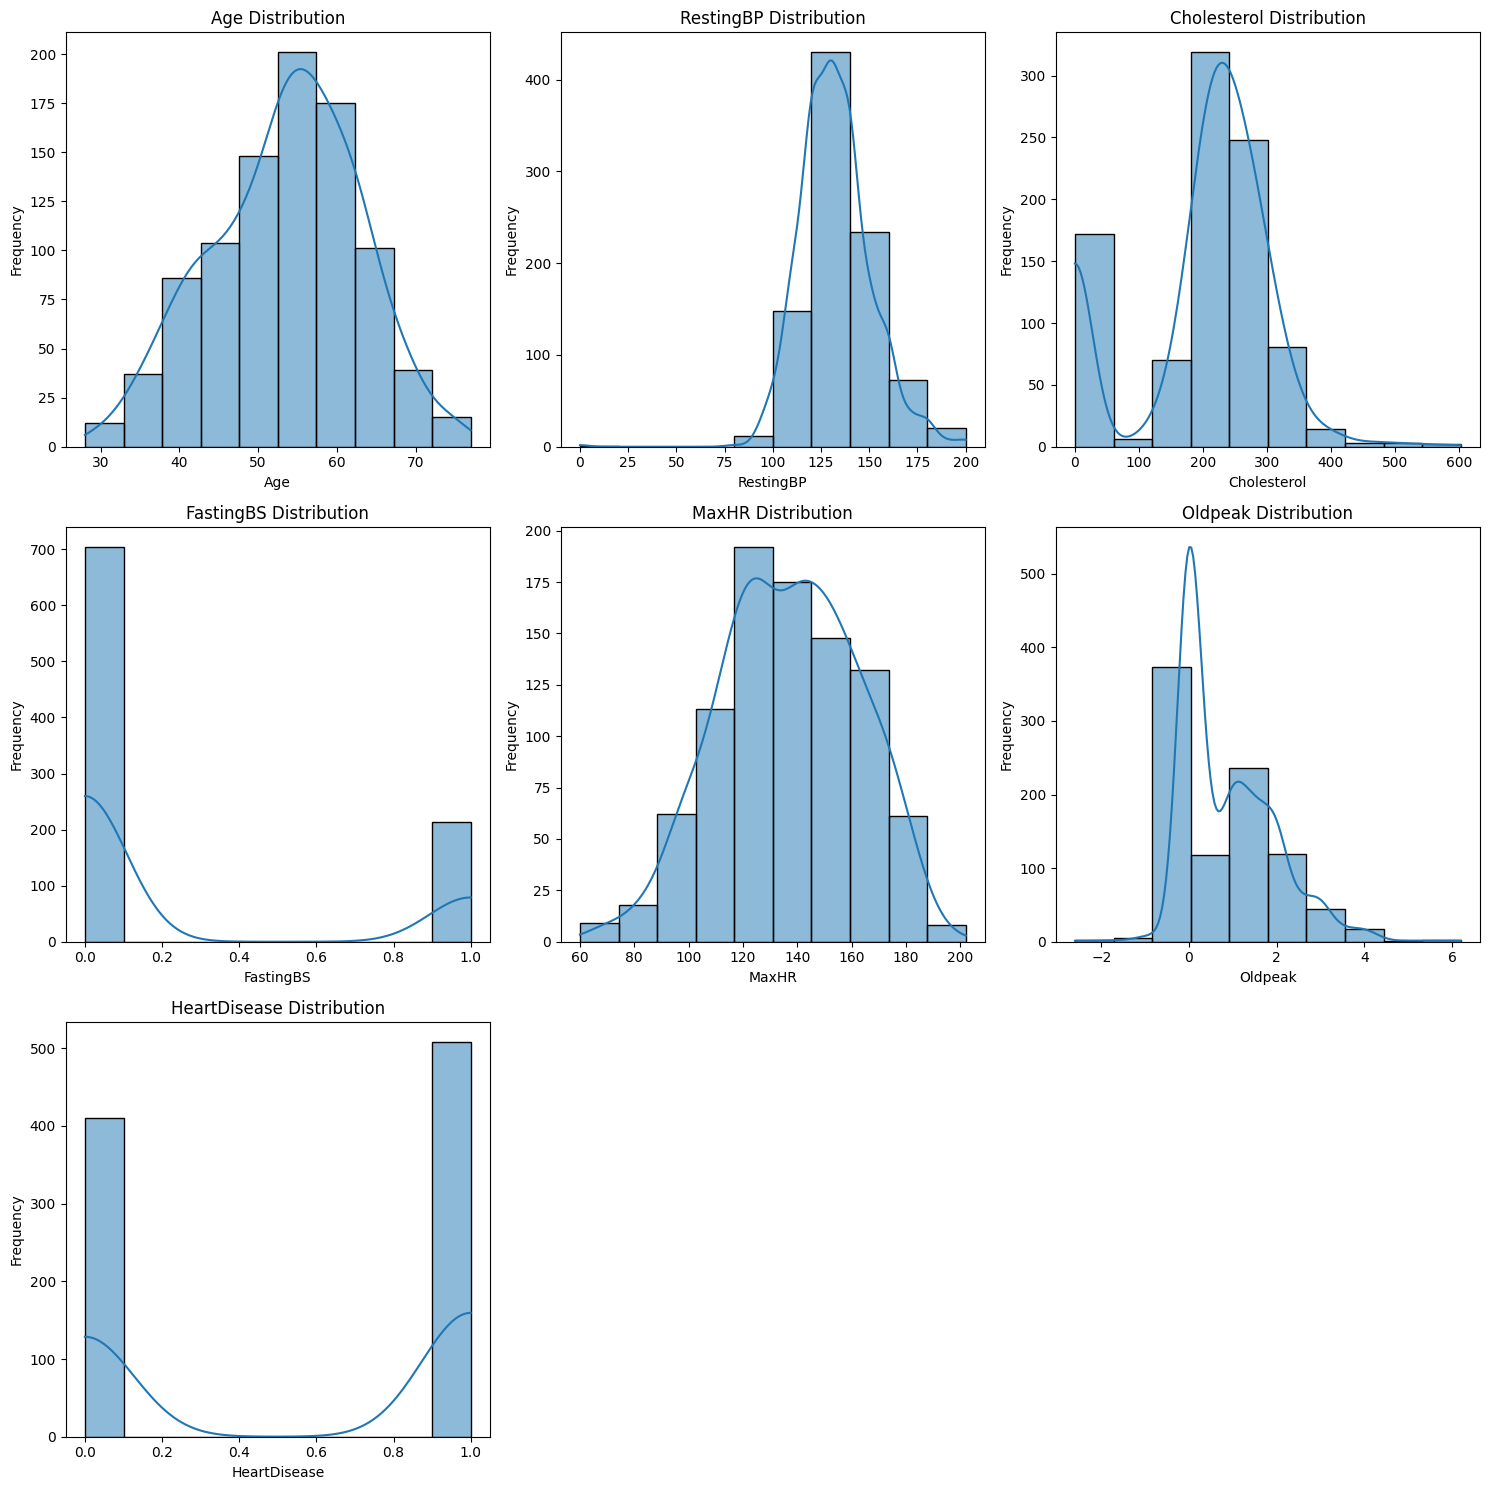

<Figure size 640x480 with 0 Axes>

In [ ]:
numeric_features = data.select_dtypes(include=['int', 'float']).columns

fig, axes = plt.subplots(nrows=(len(numeric_features) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numeric_features) + 2) // 3)))
axes = axes.flatten()
for ax, feature in zip(axes, numeric_features):
    sns.histplot(data[feature], bins=10, kde=True, ax=ax)
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/distribution_plot.png')

## <a id='toc5_2_'></a>[Scatter Plots](#toc0_)

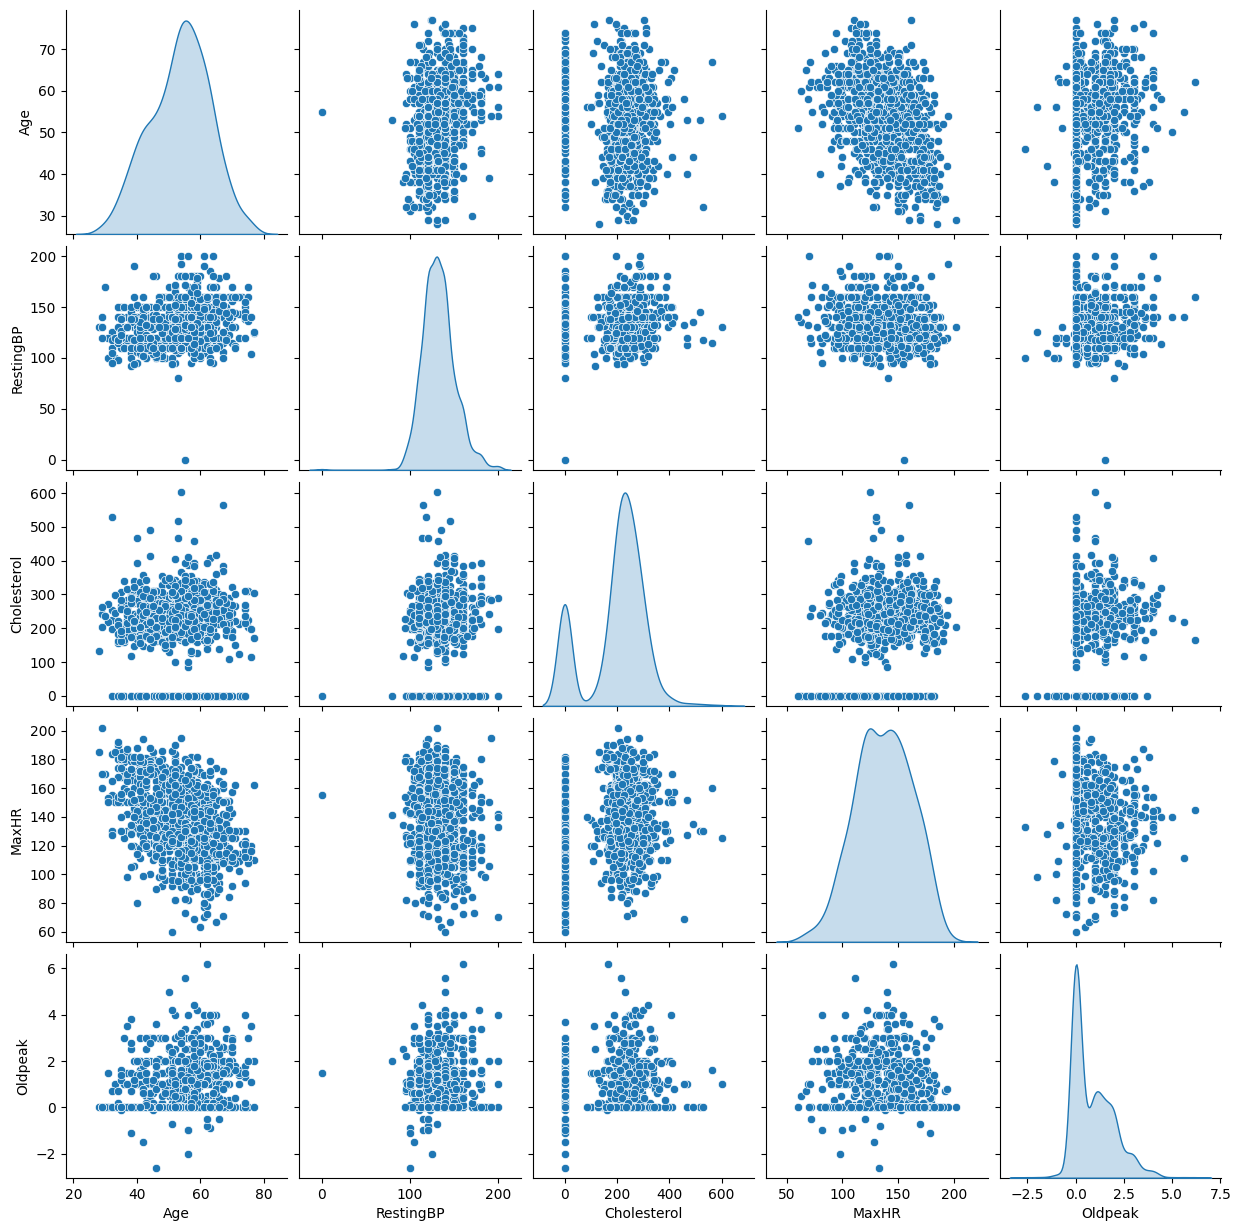

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.pairplot(data[numeric_features].drop(columns=['FastingBS','HeartDisease']), diag_kind='kde')  
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/pairplot.png')

## <a id='toc5_3_'></a>[Correlation Matrix](#toc0_)

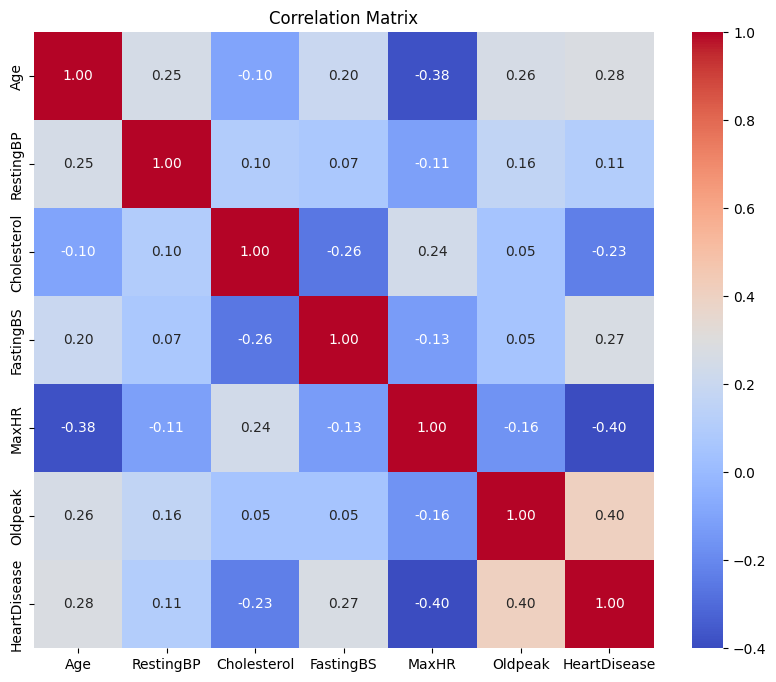

<Figure size 640x480 with 0 Axes>

In [ ]:
corr_matrix = data.select_dtypes(['int','float']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=False)
plt.title('Correlation Matrix')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/correlation_matrix.png')

## <a id='toc5_4_'></a>[IQR](#toc0_)

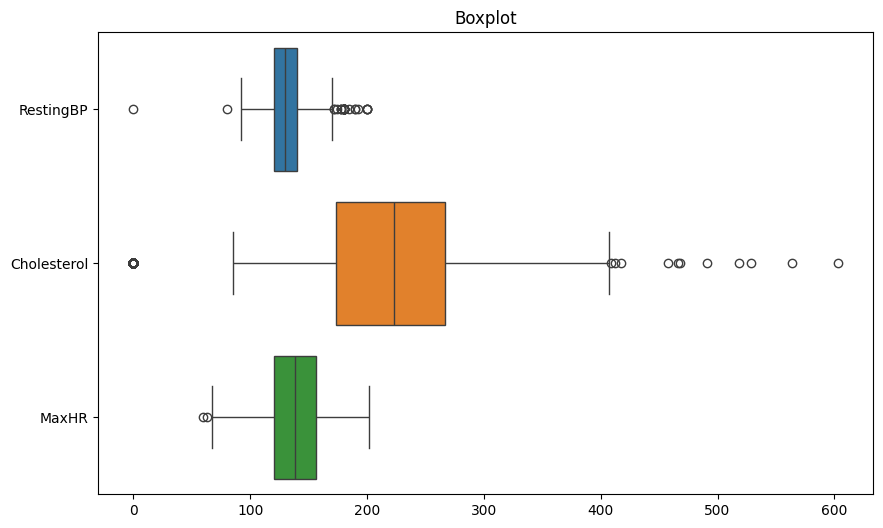

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['Age','Oldpeak','HeartDisease','FastingBS']), orient='h')
plt.title('Boxplot')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/boxplot.png')

In [ ]:
data[data['RestingBP']>180]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
241   54   M           ASY        200          198          0     Normal   
365   64   F           ASY        200            0          0     Normal   
372   63   M           ASY        185            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
592   61   M           ASY        190          287          1        LVH   
732   56   F           ASY        200          288          1        LVH   
759   54   M           ATA        192          283          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
109    106              N      0.0       Up             0  
241    142              Y      2.0     Flat             1  
365    140              Y      1.0     Flat             1  
372     98              Y      0.0       Up             1  
399     70              N      0.0     Flat             1  
592    150              Y      2.0     Down             1  
732    133              Y      4.0     Down             1  
759    195              N      0.0       Up             1

## <a id='toc5_5_'></a>[Pie Chart Plots](#toc0_)

In [24]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [25]:
def pie_chart(data, column):
    grouped_data=data.groupby(column)
    counts = grouped_data['Age'].count()
    plt.figure(figsize=(5, 3))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.legend(title='Count', labels=[f'{gender}: {count}' for gender, count in counts.items()], fontsize=5)
    plt.title('Count of '+' and '.join(data[column].unique().astype(str)))
    plt.show()
    plt.savefig(os.path.join(cfg.HeartFailure.LOGS_PLOTS_PATH,'pie_chart_'+column+'.png'))

In [26]:
def compact_pie_chart(data, column,ax):
    grouped_data = data.groupby(column)
    counts = grouped_data['Age'].count()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.legend(title=f'Count of {column}', labels=[f'{label}: {count}' for label, count in counts.items()], title_fontsize='7', fontsize='5', loc='best')
    ax.set_title('Count of ' + ' and '.join(data[column].unique().astype(str)))

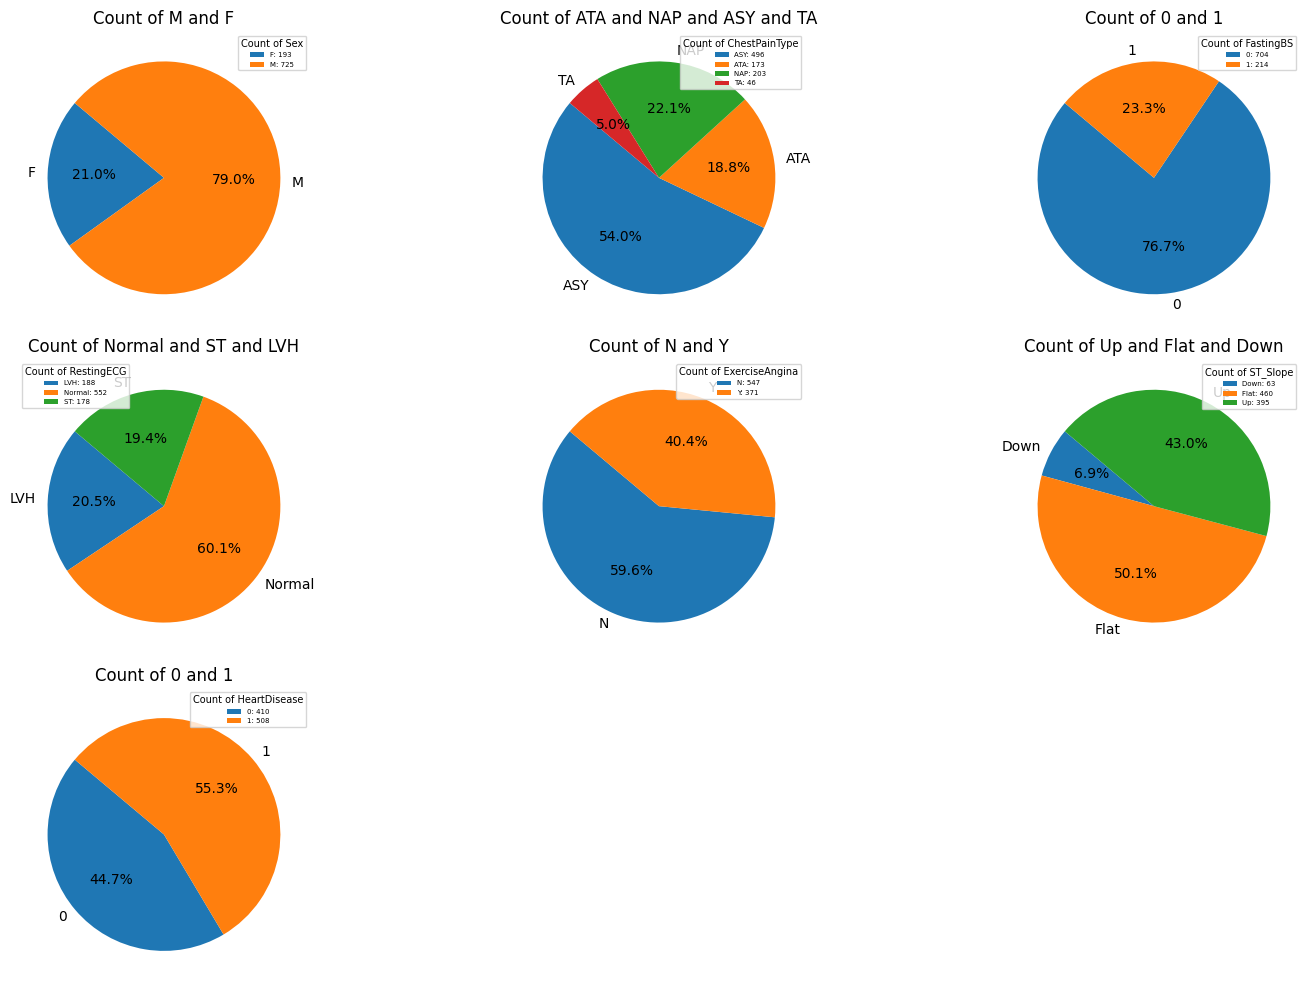

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for ax, column in zip(axes, columns):
    compact_pie_chart(data, column, ax)
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### <a id='toc5_5_1_'></a>[Gender Counts](#toc0_)

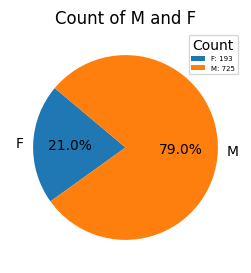

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'Sex')

### <a id='toc5_5_2_'></a>[Chest Pain Types Counts](#toc0_)

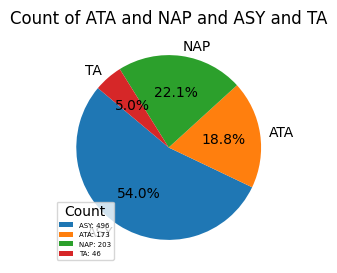

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'ChestPainType')

### <a id='toc5_5_3_'></a>[Fasting BS Counts](#toc0_)

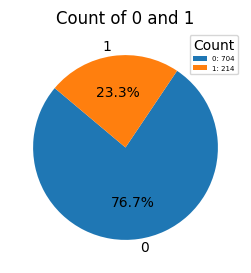

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'FastingBS')

### <a id='toc5_5_4_'></a>[Resting ECG Counts](#toc0_)

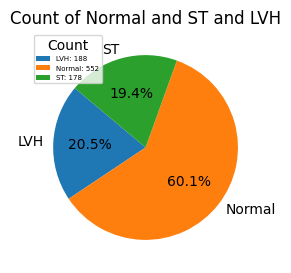

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'RestingECG')

### <a id='toc5_5_5_'></a>[ExerciseAngina Counts](#toc0_)

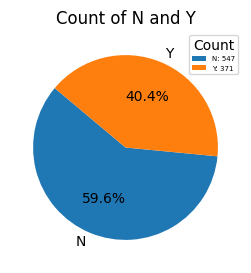

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'ExerciseAngina')

### <a id='toc5_5_6_'></a>[ST Slope Counts](#toc0_)

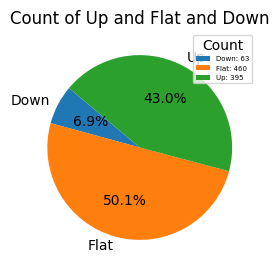

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'ST_Slope')

### <a id='toc5_5_7_'></a>[Heart Disease Counts](#toc0_)

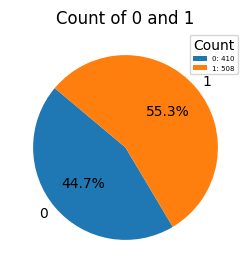

<Figure size 640x480 with 0 Axes>

In [ ]:
pie_chart(data,'HeartDisease')

## <a id='toc5_6_'></a>[Swarm Plots](#toc0_)

> **could be removed in the future**

In [ ]:
# plt.figure(1 , figsize = (15 , 7))
# n = 0 
# for cols in ['RestingBP' , 'Cholesterol' , 'Oldpeak']:
#     n += 1 
#     plt.subplot(1 , 3 , n)
#     plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
#     sns.violinplot(x = cols , y = 'Sex' , data = data , palette = 'vlag')
#     sns.swarmplot(x = cols , y = 'Sex' , data = data)
#     plt.ylabel('Sex' if n == 1 else '')
#     plt.title('Boxplots & Swarmplots' if n == 2 else '')
# plt.show()

# <a id='toc6_'></a>[Conclusions](#toc0_)

In [36]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


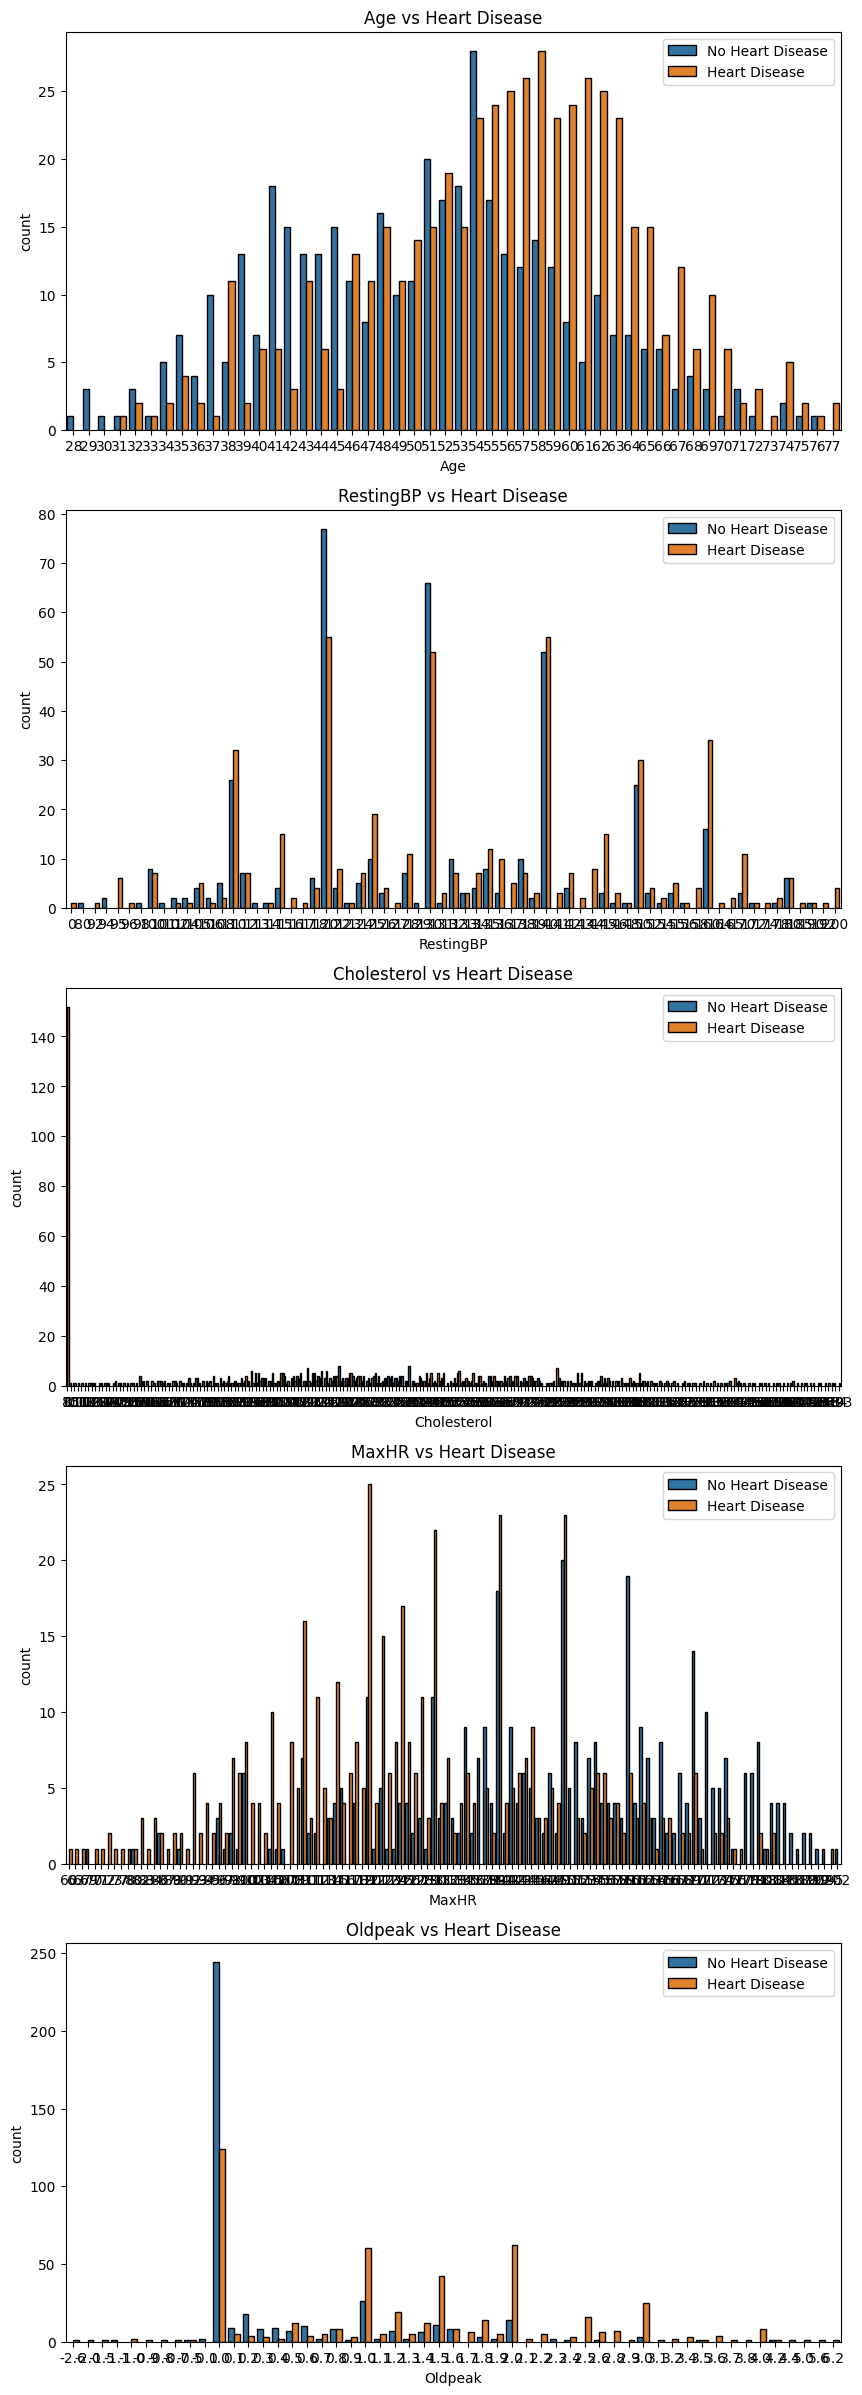

In [37]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (10,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=numerical_features[i], data=data, hue="HeartDisease", edgecolor='black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

In [38]:

discrete_data = data.copy()

discrete_data['RestingBP_Group'] = [ int(i / 5) for i in discrete_data['RestingBP']]
discrete_data['Cholesterol_Group'] = [ int(i / 10) for i in discrete_data['Cholesterol']]
discrete_data['MaxHR_Group'] = [ int(i / 5) for i in discrete_data['MaxHR']]
discrete_data['Oldpeak_Group'] = [ int((i*10) / 5) for i in discrete_data['Oldpeak']]
discrete_data['Age_Group'] = [ int(i / 10) for i in discrete_data['Age']]


discrete_data.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  RestingBP_Group  \
0              N      0.0       Up             0               28   
1              N      1.0     Flat             1               32   
2              N      0.0       Up             0               26   
3              Y      1.5     Flat             1               27   
4              N      0.0       Up             0               30   

   Cholesterol_Group  MaxHR_Group  Oldpeak_Group  Age_Group  
0                 28           34              0          4  
1                 18           31              2          4  
2                 28           19              0          3  
3                 21           21              3          4  
4                 19           24              0          5

In [39]:
group_numerical_features = ['Age_Group','RestingBP_Group','Cholesterol_Group','MaxHR_Group','Oldpeak_Group']

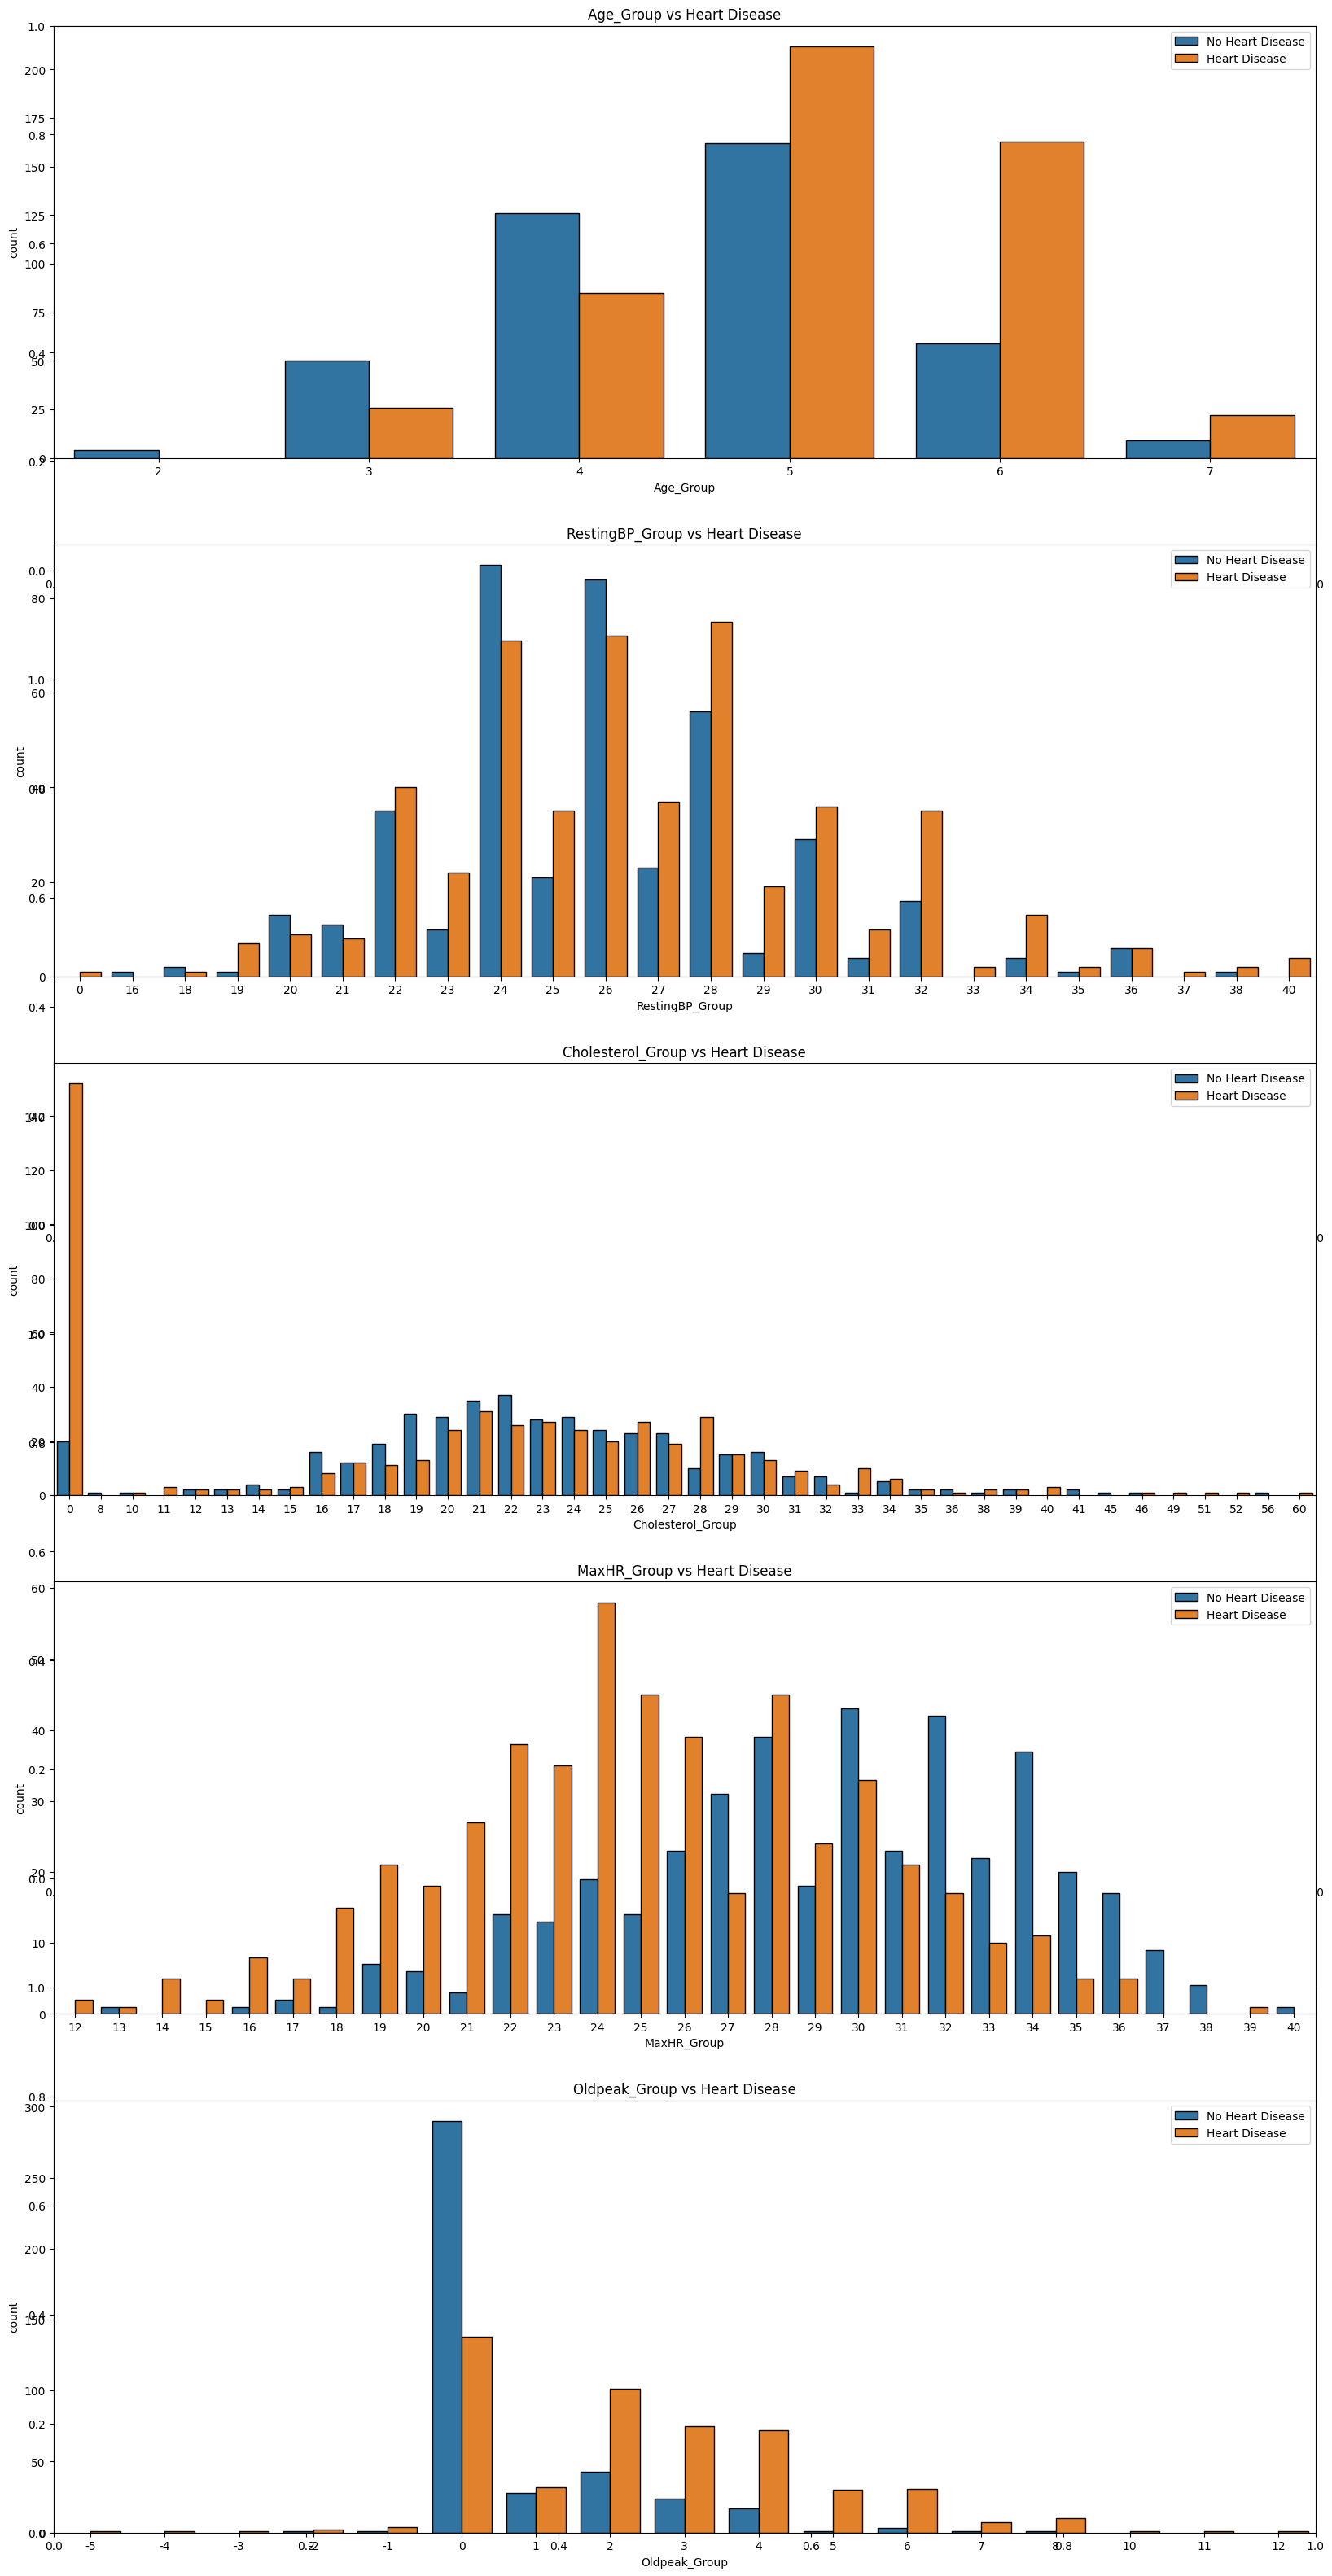

In [40]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (20,40))
for i in range(len(group_numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=group_numerical_features[i], data=discrete_data, hue="HeartDisease", edgecolor='black')
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

> <br>
> 
> **🤔 Conclusions:** 
> - people with `age` values between (55-77) are highely compromised to be diagnosed with heart failure.
> - people with `Oldpeak` values between (0.5-6) are highely compromised to be diagnosed with heart failure. 
> - people with `Cholesterol` values between (220-230) and (330-400) are highely compromised to be diagnosed with heart failure. 
> - people with `MaxHR` values between (60-130) and (140-145) are highely compromised to be diagnosed with heart failure. 
> - people with `RestingBP` values between (135-200) are highely compromised to be diagnosed with heart failure. 
> <br>
> <br>

# <a id='toc7_'></a>[PCA](#toc0_)

In [41]:
def apply_PCA(n_components, data):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)
    return pca_data, pca

In [42]:
def pca(n_components, data):
    pca_data, pca = apply_PCA(n_components, data)
    print('Explained Variance Ratio :',pca.explained_variance_ratio_)
    print('Explained Variance :',pca.explained_variance_)
    return pca_data,pca

In [43]:
def plot_2d_3d(df):
    """
    Displays either a 2D or 3D scatter plot of features in a DataFrame.
    Prioritizes 3D plotting if sufficient numerical columns exist.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
    """
    
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) >= 3:
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(
            df[numeric_columns[0]],
            df[numeric_columns[1]],
            df[numeric_columns[2]],
            c='red',
            alpha=0.6
        )
        ax.set_title(f"3D Scatter Plot ({numeric_columns[0]}, {numeric_columns[1]}, {numeric_columns[2]})")
        ax.set_xlabel(numeric_columns[0])
        ax.set_ylabel(numeric_columns[1])
        ax.set_zlabel(numeric_columns[2])
        plt.show()
    elif len(numeric_columns) >= 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df[numeric_columns[0]], df[numeric_columns[1]], c='blue', alpha=0.6)
        plt.title(f"2D Scatter Plot ({numeric_columns[0]} vs {numeric_columns[1]})")
        plt.xlabel(numeric_columns[0])
        plt.ylabel(numeric_columns[1])
        plt.grid(True)
        plt.show()
    else:
        print("The DataFrame must have at least 2 numerical columns for plotting.")


In [ ]:
PCA_1D=PCA(n_components=1)
PCA_2D=PCA(n_components=2)

## <a id='toc7_1_'></a>[PCA 1D](#toc0_)

In [ ]:
data_encoded = data.copy()
le=LabelEncoder()
for i in cfg.HeartFailure.CATEGORICAL_COLUMNS:
    data_encoded[i]=le.fit_transform(data_encoded[i])

### <a id='toc7_1_1_'></a>[Raw Data](#toc0_)

In [46]:
data_PCA_1D,PCA_1D=apply_PCA(1,data_encoded)

In [47]:
PCA_1D.explained_variance_ratio_

array([0.92020198])

In [48]:
data_PCA_1D = pd.DataFrame(data_PCA_1D, columns=['PCA_F1'])
data_PCA_1D['HeartDisease'] = data_encoded['HeartDisease'].values

In [49]:
data_PCA_1D.head()

PCA_F1  HeartDisease
0  92.311503             0
1 -17.143183             1
2  81.906031             0
3  13.653713             1
4  -4.347067             0

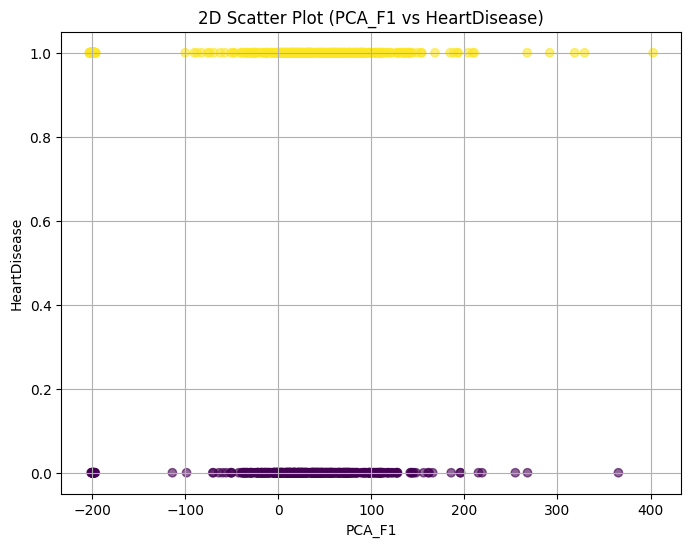

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(data_PCA_1D['PCA_F1'], data_PCA_1D['HeartDisease'], c=data_PCA_1D['HeartDisease'], cmap='viridis', alpha=0.6)
plt.title("2D Scatter Plot (PCA_F1 vs HeartDisease)")
plt.xlabel('PCA_F1')
plt.ylabel('HeartDisease')
plt.grid(True)
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/2D_Scatter_Plot_PCA_F1_vs_HeartDisease.png')

`%matplotlib widget` is to make the 3d plot interacctive

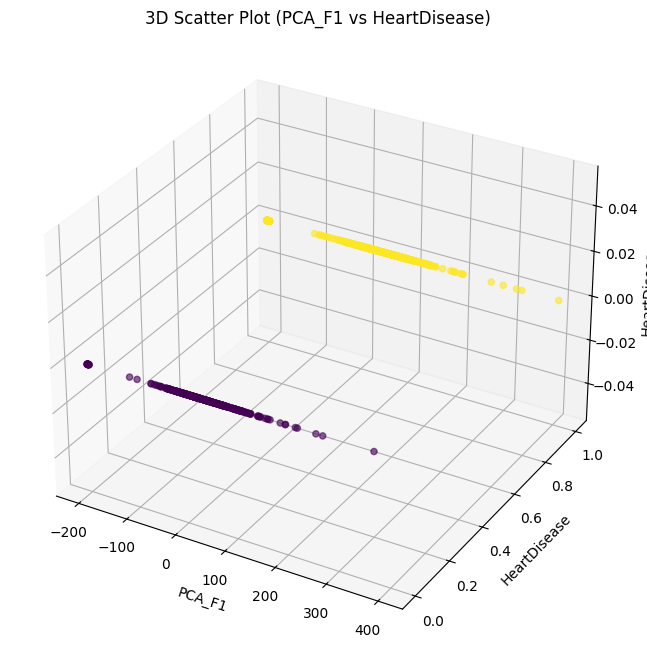

<Figure size 640x480 with 0 Axes>

In [ ]:
# %matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    data_PCA_1D['PCA_F1'],
    data_PCA_1D['HeartDisease'],
    c=data_PCA_1D['HeartDisease'],
    cmap='viridis',
    alpha=0.6
)
ax.set_title("3D Scatter Plot (PCA_F1 vs HeartDisease)")
ax.set_xlabel('PCA_F1')
ax.set_ylabel('HeartDisease')
ax.set_zlabel('HeartDisease')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/3D_Scatter_Plot_1D_PCA_F1_vs_HeartDisease.png')

## <a id='toc7_2_'></a>[PCA 2D](#toc0_)

### <a id='toc7_2_1_'></a>[Raw data](#toc0_)

In [52]:
data_PCA_2D,PCA_2D=apply_PCA(2,data_encoded)

In [53]:
PCA_2D.explained_variance_ratio_

array([0.92020198, 0.04913467])

In [54]:
data_PCA_2D = pd.DataFrame(data_PCA_2D, columns=['PCA_F1','PCA_F2'])
data_PCA_2D['HeartDisease'] = data_encoded['HeartDisease'].values

In [55]:
data_PCA_2D.head()

PCA_F1     PCA_F2  HeartDisease
0  92.311503 -29.443395             0
1 -17.143183 -13.747713             1
2  81.906031  38.222917             0
3  13.653713  28.752085             1
4  -4.347067  18.081453             0

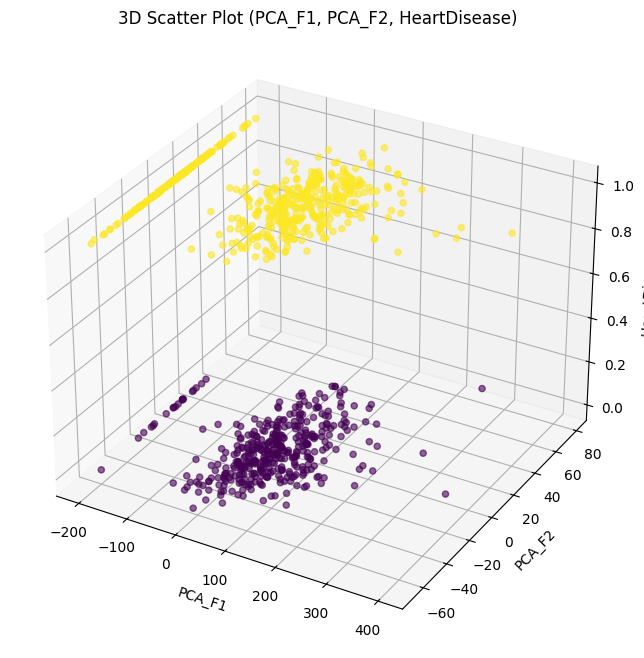

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    data_PCA_2D['PCA_F1'],
    data_PCA_2D['PCA_F2'],
    data_PCA_2D['HeartDisease'],
    c=data_PCA_2D['HeartDisease'],
    cmap='viridis',
    alpha=0.6
)
ax.set_title("3D Scatter Plot (PCA_F1, PCA_F2, HeartDisease)")
ax.set_xlabel('PCA_F1')
ax.set_ylabel('PCA_F2')
ax.set_zlabel('HeartDisease')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/3D_Scatter_Plot_2D_PCA_F1_F2_vs_HeartDisease.png')

# <a id='toc8_'></a>[LDA](#toc0_)

In [57]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [58]:
def apply_LDA(n_components, data, target):
    lda = LDA(n_components=n_components)
    lda_data = lda.fit_transform(data, target)
    return lda_data, lda

In [59]:
data_encoded = data.copy()
le = LabelEncoder()
for col in cfg.HeartFailure.CATEGORICAL_COLUMNS:
    data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded['Oldpeak']=np.abs(data_encoded['Oldpeak'])

In [60]:
target = data_encoded['HeartDisease']
features = data_encoded.drop(columns=['HeartDisease'])
lda_data, lda = apply_LDA(n_components=2, data=features, target=target)

In [61]:
lda_df = pd.DataFrame(lda_data, columns=['LDA_F1','LDA_F2'])
lda_df['HeartDisease'] = target.values

lda_df

LDA_F1    LDA_F2  HeartDisease
0    0.102341  0.897659             0
1    0.346928  0.653072             1
2    0.007397  0.992603             0
3    0.176582  0.823418             1
4    0.268177  0.731823             0
..        ...       ...           ...
913  0.057760  0.942240             1
914  0.313835  0.686165             1
915  0.410520  0.589480             1
916  0.210833  0.789167             1
917  0.335161  0.664839             0

[918 rows x 3 columns]

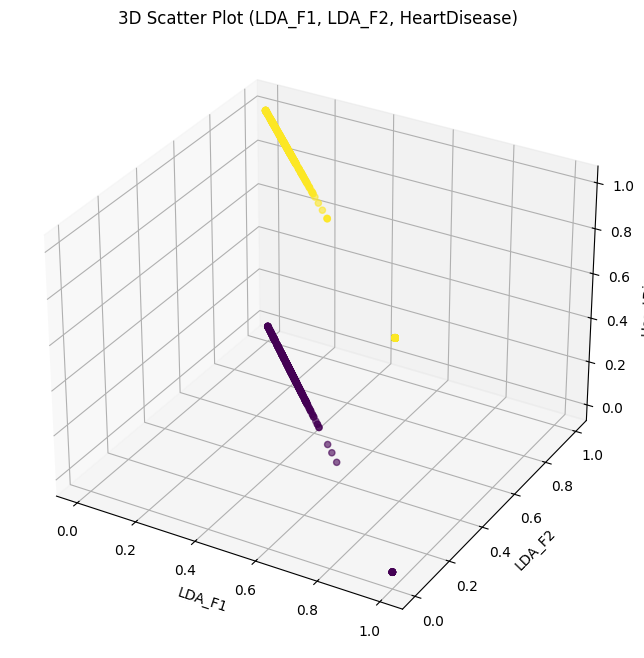

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    lda_df['LDA_F1'],
    lda_df['LDA_F2'],
    lda_df['HeartDisease'],
    c=lda_df['HeartDisease'],
    cmap='viridis',
    alpha=0.6
)
ax.set_title("3D Scatter Plot (LDA_F1, LDA_F2, HeartDisease)")
ax.set_xlabel('LDA_F1')
ax.set_ylabel('LDA_F2')
ax.set_zlabel('HeartDisease')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/3D_Scatter_Plot_LDA_F1_F2_vs_HeartDisease.png')

# <a id='toc9_'></a>[Data Cleaning and Preprocessing](#toc0_)

## <a id='toc9_1_'></a>[Missing Values](#toc0_)

> <br>
> 
> **💡Note:** *Cholesterol* of a person can never be 0. These 0s will be replaced with median values of the corresponding columns, that's because medians aren't affected by outliers. <br>
> <br>
> 


### <a id='toc9_1_1_'></a>[Cholesterol](#toc0_)

> We will try three methods
> - Dropping rows with cholesterol==0
> - Replacing with mean
> - Replacing with Median
>
> then get the correlation with the target column to see which approach will give the best correlation

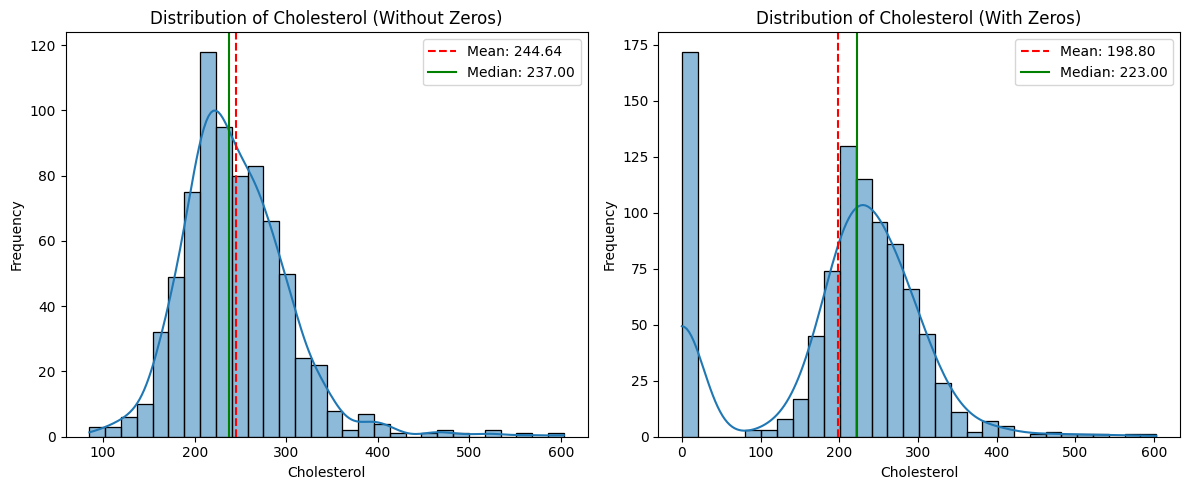

In [63]:
mean_cholesterol = data[data['Cholesterol'] != 0]['Cholesterol'].mean()
median_cholesterol = data[data['Cholesterol'] != 0]['Cholesterol'].median()

mean_cholesterol_with_zeros = data['Cholesterol'].mean()
median_cholesterol_with_zeros = data['Cholesterol'].median()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(data[data['Cholesterol'] != 0]['Cholesterol'], bins=30, kde=True, ax=axes[0])
axes[0].axvline(mean_cholesterol, color='r', linestyle='--', label=f'Mean: {mean_cholesterol:.2f}')
axes[0].axvline(median_cholesterol, color='g', linestyle='-', label=f'Median: {median_cholesterol:.2f}')
axes[0].set_title('Distribution of Cholesterol (Without Zeros)')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(data['Cholesterol'], bins=30, kde=True, ax=axes[1])
axes[1].axvline(mean_cholesterol_with_zeros, color='r', linestyle='--', label=f'Mean: {mean_cholesterol_with_zeros:.2f}')
axes[1].axvline(median_cholesterol_with_zeros, color='g', linestyle='-', label=f'Median: {median_cholesterol_with_zeros:.2f}')
axes[1].set_title('Distribution of Cholesterol (With Zeros)')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

In [64]:
print("Cholesterol Mean Value= ",data['Cholesterol'].mean())
print("Cholesterol Median Value= ",data['Cholesterol'].median())

Cholesterol Mean Value=  198.7995642701525
Cholesterol Median Value=  223.0


In [65]:
print("Cholesterol Mean Value without 0s = ",data['Cholesterol'].replace(0, np.nan).dropna().mean())
print("Cholesterol Median Value without 0s = ",data['Cholesterol'].replace(0, np.nan).dropna().median())

Cholesterol Mean Value without 0s =  244.6353887399464
Cholesterol Median Value without 0s =  237.0


> Dropping rows with Cholesterol==0

In [66]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [67]:
data['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [68]:
data[data['Cholesterol']==0].shape[0]

172

In [69]:
drop_corr = round(data['Cholesterol'].replace(0, np.nan).dropna().corr(data['HeartDisease']),3)
print("Correlation between Cholesterol and HeartDisease after dropping=",drop_corr)

Correlation between Cholesterol and HeartDisease after dropping= 0.104


> Replacing rows with Cholesterol==0 with mean value

In [70]:
mean_corr = round(data['Cholesterol'].replace(0, data[data['Cholesterol']!=0]['Cholesterol'].mean()).corr(data['HeartDisease']),3)
print("Correlation between Cholesterol and HeartDisease after replacing with mean=",mean_corr)

Correlation between Cholesterol and HeartDisease after replacing with mean= 0.094


> Replacing rows with Cholesterol==0 with median value

In [71]:
median_corr = round(data['Cholesterol'].replace(0, data[data['Cholesterol']!=0]['Cholesterol'].median()).corr(data['HeartDisease']),3)
print("Correlation between Cholesterol and HeartDisease after replacing with median=",median_corr)

Correlation between Cholesterol and HeartDisease after replacing with median= 0.076


> **💡Note:** as we see the best correlation appears when dropping the colesterol

> to ensure the results will get the correlation before and after the dropping for each feature and get the difference between them

In [72]:
data_encoded = data.copy()
encoder = LabelEncoder()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = encoder.fit_transform(data_encoded[col])

In [73]:
df_before_drop = data_encoded.copy()
df_after_drop = data_encoded.copy()

df_after_drop['Cholesterol'] = df_after_drop['Cholesterol'].replace(0, np.nan)
df_after_drop.dropna(inplace=True)

corr_before = round(df_before_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)
corr_after = round(df_after_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)

In [74]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr_before_drop_0','corr_after_drop_0','difference']
difference_df

corr_before_drop_0  corr_after_drop_0  difference
ExerciseAngina               0.494              0.552       0.058
Oldpeak                      0.404              0.496       0.092
Sex                          0.305              0.293      -0.012
Age                          0.282              0.299       0.017
FastingBS                    0.267              0.161      -0.106
RestingBP                    0.108              0.173       0.065
RestingECG                   0.057              0.010      -0.047
Cholesterol                 -0.233              0.104       0.337
ChestPainType               -0.387             -0.396      -0.009
MaxHR                       -0.400             -0.377       0.023
ST_Slope                    -0.559             -0.597      -0.038

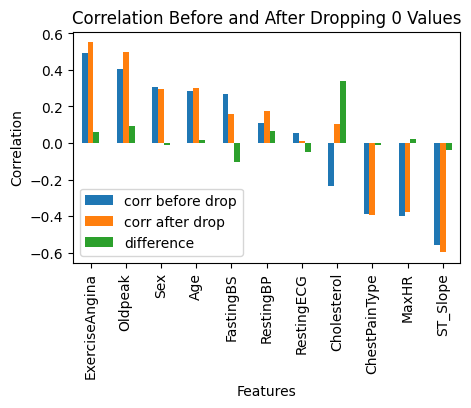

<Figure size 640x480 with 0 Axes>

In [75]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr before drop','corr after drop','difference']
difference_df.plot(kind='bar', figsize=(5, 3))
plt.title('Correlation Before and After Dropping 0 Values')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/correlation_before_after_drop.png')

In [76]:
df_after_mean = data_encoded.copy()

df_after_mean['Cholesterol'] = df_after_mean['Cholesterol'].replace(0, df_after_mean[df_after_mean['Cholesterol']!=0]['Cholesterol'].mean())

corr_before = round(df_before_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)
corr_after = round(df_after_mean.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)

In [77]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr_before_mean_0','corr_after_mean_0','difference']
difference_df

corr_before_mean_0  corr_after_mean_0  difference
ExerciseAngina               0.494              0.494       0.000
Oldpeak                      0.404              0.404       0.000
Sex                          0.305              0.305       0.000
Age                          0.282              0.282       0.000
FastingBS                    0.267              0.267       0.000
RestingBP                    0.108              0.108       0.000
RestingECG                   0.057              0.057       0.000
Cholesterol                 -0.233              0.094       0.327
ChestPainType               -0.387             -0.387       0.000
MaxHR                       -0.400             -0.400       0.000
ST_Slope                    -0.559             -0.559       0.000

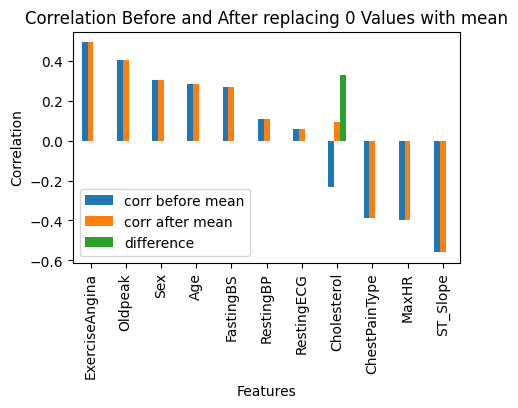

<Figure size 640x480 with 0 Axes>

In [78]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr before mean','corr after mean','difference']
difference_df.plot(kind='bar', figsize=(5, 3))
plt.title('Correlation Before and After replacing 0 Values with mean')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/correlation_before_after_mean.png')

In [79]:
df_after_median = data_encoded.copy()

df_after_median['Cholesterol'] = df_after_median['Cholesterol'].replace(0, df_after_median[df_after_median['Cholesterol']!=0]['Cholesterol'].median())

corr_before = round(df_before_drop.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)
corr_after = round(df_after_median.corr().sort_values('HeartDisease',ascending=False).iloc[1:, :]['HeartDisease'],3)

In [80]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr_before_median_0','corr_after_median_0','difference']
difference_df

corr_before_median_0  corr_after_median_0  difference
ExerciseAngina                 0.494                0.494       0.000
Oldpeak                        0.404                0.404       0.000
Sex                            0.305                0.305       0.000
Age                            0.282                0.282       0.000
FastingBS                      0.267                0.267       0.000
RestingBP                      0.108                0.108       0.000
RestingECG                     0.057                0.057       0.000
Cholesterol                   -0.233                0.076       0.309
ChestPainType                 -0.387               -0.387       0.000
MaxHR                         -0.400               -0.400       0.000
ST_Slope                      -0.559               -0.559       0.000

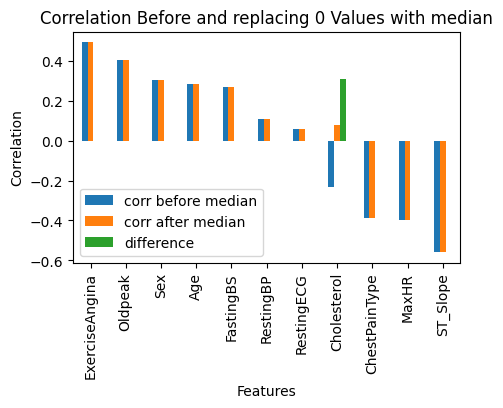

<Figure size 640x480 with 0 Axes>

In [81]:
difference_df = pd.concat([corr_before, corr_after,(corr_after - corr_before)], axis=1)
difference_df.columns = ['corr before median','corr after median','difference']
difference_df.plot(kind='bar', figsize=(5, 3))
plt.title('Correlation Before and replacing 0 Values with median')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/correlation_before_after_median.png')

> **💭Decision:** we decided to replace with `median` values, because it's true that `dropping` them makes better correlation coeff for `Cholesterol` but it affected other features' Correlation<br> <br>
> in addition to that `median` instead of `mean` because medical data like cholesterol often has naturally occurring outliers because of the variance in patient conditions. The `median` value ensures that these valid outliers don't influence the changed values alot.<br> <br>
> the correlation isn't that higher when imputing with mean than with median, regardless that the task is a classification problem, and correlation coeff may not show that much intuition about the resulting output <br> <br>
> the effect of correlation does depend on the type of classifier. Some nonparametric classifiers are less sensitive to correlation of variable.

In [82]:
print("Cholesterol Median Value= ",data['Cholesterol'].median())
print("Cholesterol Median Value without 0s = ",data['Cholesterol'].replace(0, np.nan).dropna().median())

Cholesterol Median Value=  223.0
Cholesterol Median Value without 0s =  237.0


In [83]:
data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].replace(0,np.nan).dropna().median())

In [ ]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

### <a id='toc9_1_2_'></a>[RestingBP](#toc0_)

> **💡Note:** *Resting Blood Pressure* of a person can never be 0. these 0s will be replaced with median values of the corresponding columns, that's because medians aren't affected by outliers <br>
> <br>

> **🤔Conclusion:** RestingBP can't be zero, so it will be considered as a missing value

In [85]:
data[data['RestingBP']==0]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0          237          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1

In [86]:
print("RestingBP Mean Value= ",data['RestingBP'].mean())
print("RestingBP Mean Value without 0s = ",data[data['RestingBP'] != 0]['RestingBP'].mean())
print("RestingBP Median Value= ",data['RestingBP'].median())
print("RestingBP Median Value without 0s = ",data[data['RestingBP'] != 0]['RestingBP'].median())

RestingBP Mean Value=  132.39651416122004
RestingBP Mean Value without 0s =  132.54089422028352
RestingBP Median Value=  130.0
RestingBP Median Value without 0s =  130.0


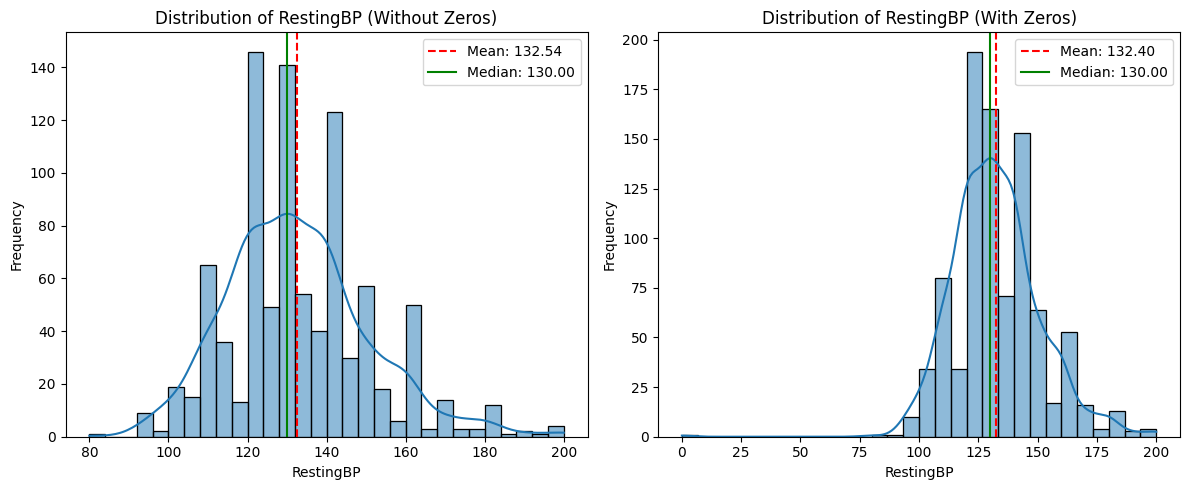

In [87]:
mean_RestingBP = data[data['RestingBP'] != 0]['RestingBP'].mean()
median_RestingBP = data[data['RestingBP'] != 0]['RestingBP'].median()

mean_RestingBP_with_zeros = data['RestingBP'].mean()
median_RestingBP_with_zeros = data['RestingBP'].median()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(data[data['RestingBP'] != 0]['RestingBP'], bins=30, kde=True, ax=axes[0])
axes[0].axvline(mean_RestingBP, color='r', linestyle='--', label=f'Mean: {mean_RestingBP:.2f}')
axes[0].axvline(median_RestingBP, color='g', linestyle='-', label=f'Median: {median_RestingBP:.2f}')
axes[0].set_title('Distribution of RestingBP (Without Zeros)')
axes[0].set_xlabel('RestingBP')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(data['RestingBP'], bins=30, kde=True, ax=axes[1])
axes[1].axvline(mean_RestingBP_with_zeros, color='r', linestyle='--', label=f'Mean: {mean_RestingBP_with_zeros:.2f}')
axes[1].axvline(median_RestingBP_with_zeros, color='g', linestyle='-', label=f'Median: {median_RestingBP_with_zeros:.2f}')
axes[1].set_title('Distribution of RestingBP (With Zeros)')
axes[1].set_xlabel('RestingBP')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

> **💡Note:** as the `RestingBP` feature is almost normally distributed "after removing zero values" as `mean almost equals median`, we decided to replace them with the median value

In [88]:
data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].replace(0,np.nan).dropna().median())

In [ ]:
data[data['RestingBP']==0].shape[0]

0

## <a id='toc9_2_'></a>[Outlier Removal](#toc0_)

> **💡Note:** TA could be converted to ATA, it could be a Typo error. "Overthinking" 

### <a id='toc9_2_1_'></a>[Cholesterol](#toc0_)

> **💡Note:** we won't remove any more outliers in Cholesterol column as it's a medical dataset which have a meaning of outliers and it's important to take these values in considiration

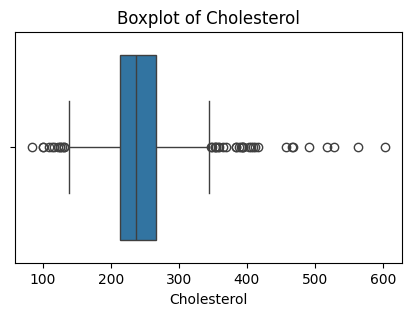

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, x='Cholesterol')
plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

### <a id='toc9_2_2_'></a>[ChestPainType](#toc0_)

> **💡Note:** there are few rows with the value of `TA` but after a great search and asking doctors, it was obvious that these values are real and can't be ignored

In [91]:
data[data['ChestPainType']=='TA'].shape[0]

46

In [ ]:
data[data['ChestPainType']=='TA']['HeartDisease'].value_counts()

HeartDisease
0    26
1    20
Name: count, dtype: int64

### <a id='toc9_2_3_'></a>[OldPeak](#toc0_)

> **💡Note:** `OldPeak` can't be negative

In [ ]:
data['Oldpeak'] = data['Oldpeak'].abs()

### <a id='toc9_2_4_'></a>[FastingBS](#toc0_)

> **💡Note:** FastingBS feature has about 77% of it's values are zeros, so it can be dropped 

In [94]:
print("Percentage of zero values in FastingBS: {:.2f}%".format(data[data['FastingBS'] == 0].shape[0] / data.shape[0] * 100))

Percentage of zero values in FastingBS: 76.69%


In [95]:
data=data.drop(columns=['FastingBS'])

In [ ]:

def remove_outliers_iqr(data, columns=None):
    """
    Removes outliers from a dataset using the Interquartile Range (IQR) method.
    
    Parameters:
        data (pd.DataFrame): The dataset as a pandas DataFrame.
        columns (list, optional): List of column names to check for outliers. 
                                  If None, all numeric columns are processed.
    
    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
    """
    if columns is None:
        columns = data.select_dtypes(include=['number']).columns  # Default to numeric columns
    
    clean_data = data.copy()
    
    for column in columns:
        Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                      # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the data
        clean_data = clean_data[(clean_data[column] >= lower_bound) & (clean_data[column] <= upper_bound)]
    
    return clean_data


## <a id='toc9_3_'></a>[Duplicates](#toc0_)

In [97]:
data.duplicated().sum()

0

> **🤔Conclusion:** There is no duplicated rows in the dataset

## <a id='toc9_4_'></a>[Encoding](#toc0_)

In [98]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol RestingECG  MaxHR  \
0   40   M           ATA        140          289     Normal    172   
1   49   F           NAP        160          180     Normal    156   
2   37   M           ATA        130          283         ST     98   
3   48   F           ASY        138          214     Normal    108   
4   54   M           NAP        150          195     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [99]:
columns_to_encode=cfg.HeartFailure.CATEGORICAL_COLUMNS

In [ ]:
def Encode(data,columns,type='label'):
    data = data.copy()
    if type == 'label':
        encoder = LabelEncoder()
        for col in columns:
            data[col] = encoder.fit_transform(data[col])
    elif type == 'onehot':
        data = pd.get_dummies(data, columns=columns,dtype=int)
    else:
        raise Exception('Invalid Type')
    return data

### <a id='toc9_4_1_'></a>[Label Encoding](#toc0_)

In [101]:
data_label_encoded = Encode(data,columns_to_encode,type='label')

In [ ]:
data_label_encoded.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  RestingECG  MaxHR  \
0   40    1              1        140          289           1    172   
1   49    0              2        160          180           1    156   
2   37    1              1        130          283           2     98   
3   48    0              0        138          214           1    108   
4   54    1              2        150          195           1    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0               0      0.0         2             0  
1               0      1.0         1             1  
2               0      0.0         2             0  
3               1      1.5         1             1  
4               0      0.0         2             0

### <a id='toc9_4_2_'></a>[One Hot Encoding](#toc0_)

In [103]:
data_onehot_encoded = Encode(data,columns_to_encode,type='onehot')

In [ ]:
data_onehot_encoded.head()

Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0   40        140          289    172      0.0             0      0      1   
1   49        160          180    156      1.0             1      1      0   
2   37        130          283     98      0.0             0      0      1   
3   48        138          214    108      1.5             1      1      0   
4   54        150          195    122      0.0             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1

## <a id='toc9_5_'></a>[Normalization](#toc0_)

In [ ]:
def Scale(data,columns,type='standard'):
    data = data.copy()
    if type.startswith("log"):
        data[columns] = np.log1p(data[columns])
    if type.endswith("standard"):
        scaler = StandardScaler()
        data[columns] = scaler.fit_transform(data[columns])
    elif type.endswith("minmax"):
        scaler = MinMaxScaler()
        data[columns] = scaler.fit_transform(data[columns])
    elif type.endswith("robust"):
        scaler = RobustScaler()
        data[columns] = scaler.fit_transform(data[columns])
    elif type.endswith("log"):
        return data
    else:
        raise Exception('Invalid Type')
    return data

### <a id='toc9_5_1_'></a>[MinMax Scaling](#toc0_)

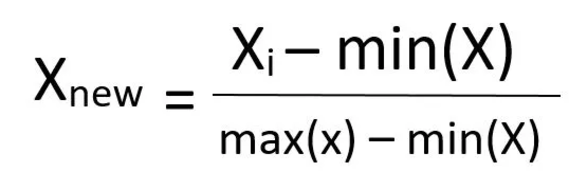

In [106]:
data_label_MM_scaled=Scale(data_label_encoded,data_label_encoded.columns.drop('HeartDisease'),type='minmax')

In [107]:
data_label_MM_scaled.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  RestingECG     MaxHR  \
0  0.244898  1.0       0.333333   0.500000     0.393822         0.5  0.788732   
1  0.428571  0.0       0.666667   0.666667     0.183398         0.5  0.676056   
2  0.183673  1.0       0.333333   0.416667     0.382239         1.0  0.267606   
3  0.408163  0.0       0.000000   0.483333     0.249035         0.5  0.338028   
4  0.530612  1.0       0.666667   0.583333     0.212355         0.5  0.436620   

   ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             0.0  0.000000       1.0             0  
1             0.0  0.161290       0.5             1  
2             0.0  0.000000       1.0             0  
3             1.0  0.241935       0.5             1  
4             0.0  0.000000       1.0             0

In [108]:
data_onehot_MM_scaled=Scale(data_onehot_encoded,data_onehot_encoded.columns.drop('HeartDisease'),type='minmax')

In [ ]:
data_onehot_MM_scaled.head()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0  0.244898   0.500000     0.393822  0.788732  0.000000             0    0.0   
1  0.428571   0.666667     0.183398  0.676056  0.161290             1    1.0   
2  0.183673   0.416667     0.382239  0.267606  0.000000             0    0.0   
3  0.408163   0.483333     0.249035  0.338028  0.241935             1    1.0   
4  0.530612   0.583333     0.212355  0.436620  0.000000             0    0.0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0    1.0                0.0                1.0                0.0   
1    0.0                0.0                0.0                1.0   
2    1.0                0.0                1.0                0.0   
3    0.0                1.0                0.0                0.0   
4    1.0                0.0                0.0                1.0   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0               0.0             0.0                1.0            0.0   
1               0.0             0.0                1.0            0.0   
2               0.0             0.0                0.0            1.0   
3               0.0             0.0                1.0            0.0   
4               0.0             0.0                1.0            0.0   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0               1.0               0.0            0.0            0.0   
1               1.0               0.0            0.0            1.0   
2               1.0               0.0            0.0            0.0   
3               0.0               1.0            0.0            1.0   
4               1.0               0.0            0.0            0.0   

   ST_Slope_Up  
0          1.0  
1          0.0  
2          1.0  
3          0.0  
4          1.0

### <a id='toc9_5_2_'></a>[Standard Scaler](#toc0_)

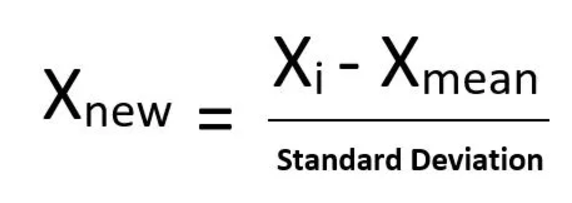

In [110]:
data_label_STD_scaled=Scale(data_label_encoded,data_label_encoded.columns.drop('HeartDisease'),type='standard')

In [111]:
data_label_STD_scaled.head()

Age       Sex  ChestPainType  RestingBP  Cholesterol  RestingECG  \
0 -1.433140  0.515952       0.229032   0.415002     0.858035    0.017255   
1 -0.478484 -1.938163       1.275059   1.527329    -1.184227    0.017255   
2 -1.751359  0.515952       0.229032  -0.141161     0.745617    1.601219   
3 -0.584556 -1.938163      -0.816995   0.303769    -0.547191    0.017255   
4  0.051881  0.515952       1.275059   0.971166    -0.903182    0.017255   

      MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0  1.382928       -0.823556 -0.878238  1.052114             0  
1  0.754157       -0.823556  0.081322 -0.596078             1  
2 -1.525138       -0.823556 -0.878238  1.052114             0  
3 -1.132156        1.214246  0.561102 -0.596078             1  
4 -0.581981       -0.823556 -0.878238  1.052114             0

In [112]:
data_onehot_STD_scaled=Scale(data_onehot_encoded,data_onehot_encoded.columns.drop('HeartDisease'),type='standard')

In [ ]:
data_onehot_STD_scaled.head()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  \
0 -1.433140   0.415002     0.858035  1.382928 -0.878238             0   
1 -0.478484   1.527329    -1.184227  0.754157  0.081322             1   
2 -1.751359  -0.141161     0.745617 -1.525138 -0.878238             0   
3 -0.584556   0.303769    -0.547191 -1.132156  0.561102             1   
4  0.051881   0.971166    -0.903182 -0.581981 -0.878238             0   

      Sex_F     Sex_M  ChestPainType_ASY  ChestPainType_ATA  \
0 -0.515952  0.515952          -1.084138           2.075177   
1  1.938163 -1.938163          -1.084138          -0.481887   
2 -0.515952  0.515952          -1.084138           2.075177   
3  1.938163 -1.938163           0.922392          -0.481887   
4 -0.515952  0.515952          -1.084138          -0.481887   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0          -0.532838         -0.229679       -0.507478           0.814275   
1           1.876744         -0.229679       -0.507478           0.814275   
2          -0.532838         -0.229679       -0.507478          -1.228087   
3          -0.532838         -0.229679       -0.507478           0.814275   
4           1.876744         -0.229679       -0.507478           0.814275   

   RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
0      -0.490449          0.823556         -0.823556      -0.271448   
1      -0.490449          0.823556         -0.823556      -0.271448   
2       2.038947          0.823556         -0.823556      -0.271448   
3      -0.490449         -1.214246          1.214246      -0.271448   
4      -0.490449          0.823556         -0.823556      -0.271448   

   ST_Slope_Flat  ST_Slope_Up  
0      -1.002181     1.150674  
1       0.997824    -0.869056  
2      -1.002181     1.150674  
3       0.997824    -0.869056  
4      -1.002181     1.150674

### <a id='toc9_5_3_'></a>[Robust Scaler](#toc0_)

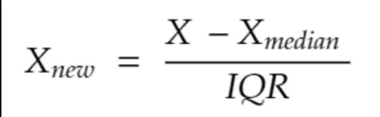

In [114]:
data_label_robust_scaled=Scale(data_label_encoded,data_label_encoded.columns.drop('HeartDisease'),type='robust')

In [115]:
data_label_robust_scaled.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  RestingECG     MaxHR  \
0 -1.076923  0.0            0.5        0.5     0.981132         0.0  0.944444   
1 -0.384615 -1.0            1.0        1.5    -1.075472         0.0  0.500000   
2 -1.307692  0.0            0.5        0.0     0.867925         1.0 -1.111111   
3 -0.461538 -1.0            0.0        0.4    -0.433962         0.0 -0.833333   
4  0.000000  0.0            1.0        1.0    -0.792453         0.0 -0.444444   

   ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             0.0 -0.400000       1.0             0  
1             0.0  0.266667       0.0             1  
2             0.0 -0.400000       1.0             0  
3             1.0  0.600000       0.0             1  
4             0.0 -0.400000       1.0             0

In [116]:
data_onehot_robust_scaled=Scale(data_onehot_encoded,data_onehot_encoded.columns.drop('HeartDisease'),type='robust')

In [117]:
data_onehot_robust_scaled.head()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0 -1.076923        0.5     0.981132  0.944444 -0.400000             0    0.0   
1 -0.384615        1.5    -1.075472  0.500000  0.266667             1    1.0   
2 -1.307692        0.0     0.867925 -1.111111 -0.400000             0    0.0   
3 -0.461538        0.4    -0.433962 -0.833333  0.600000             1    1.0   
4  0.000000        1.0    -0.792453 -0.444444 -0.400000             0    0.0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0    0.0               -1.0                1.0                0.0   
1   -1.0               -1.0                0.0                1.0   
2    0.0               -1.0                1.0                0.0   
3   -1.0                0.0                0.0                0.0   
4    0.0               -1.0                0.0                1.0   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0               0.0             0.0                0.0            0.0   
1               0.0             0.0                0.0            0.0   
2               0.0             0.0               -1.0            1.0   
3               0.0             0.0                0.0            0.0   
4               0.0             0.0                0.0            0.0   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0               0.0               0.0            0.0           -1.0   
1               0.0               0.0            0.0            0.0   
2               0.0               0.0            0.0           -1.0   
3              -1.0               1.0            0.0            0.0   
4               0.0               0.0            0.0           -1.0   

   ST_Slope_Up  
0          1.0  
1          0.0  
2          1.0  
3          0.0  
4          1.0

> **💡Note:** Possible datasets until now are:
> - data_label_MM_scaled
> - data_onehot_MM_scaled
> - data_label_STD_scaled
> - data_onehot_STD_scaled
> - data_label_robust_scaled
> - data_onehot_robust_scaled

#### <a id='toc9_5_3_1_'></a>[Data visualization before and after scaling](#toc0_)

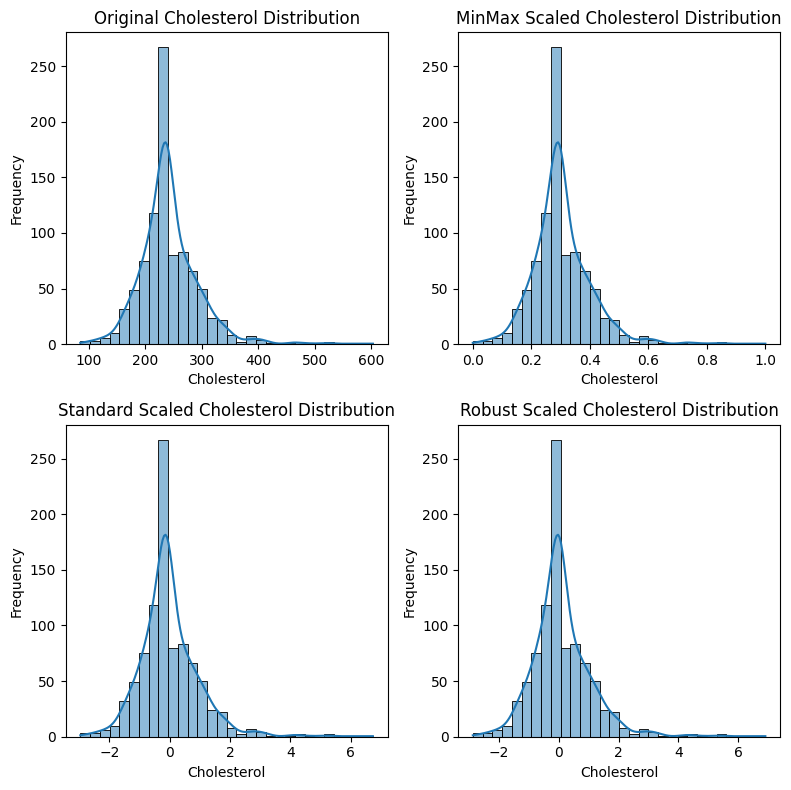

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Original Cholesterol distribution
sns.histplot(data['Cholesterol'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Cholesterol Distribution')
axes[0, 0].set_xlabel('Cholesterol')
axes[0, 0].set_ylabel('Frequency')

# MinMax Scaled Cholesterol distribution
sns.histplot(data_label_MM_scaled['Cholesterol'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('MinMax Scaled Cholesterol Distribution')
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_ylabel('Frequency')

# Standard Scaled Cholesterol distribution
sns.histplot(data_label_STD_scaled['Cholesterol'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Standard Scaled Cholesterol Distribution')
axes[1, 0].set_xlabel('Cholesterol')
axes[1, 0].set_ylabel('Frequency')

# Robust Scaled Cholesterol distribution
sns.histplot(data_label_robust_scaled['Cholesterol'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Robust Scaled Cholesterol Distribution')
axes[1, 1].set_xlabel('Cholesterol')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### <a id='toc9_5_4_'></a>[Log Normalizer](#toc0_)

> **💡Note:** After a research, we found a sclaer called Log normalizer that hugely cancels the effect of outliers in the dataset <br>
> **💡Note:** Will do it only on `Cholesterol` Column as it has the most outliers

In [119]:
data_label_log_MM_scaled=Scale(data_label_encoded,['Cholesterol'],type='logminmax')

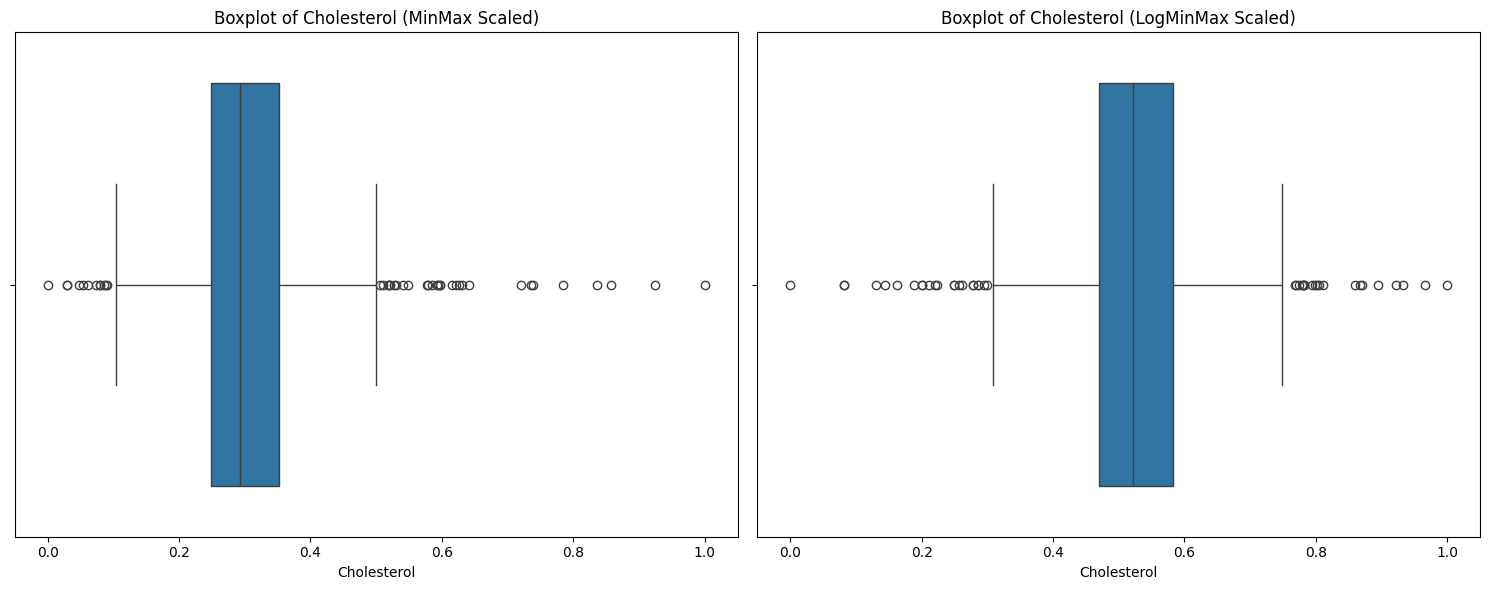

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data=data_label_MM_scaled, x='Cholesterol', ax=axes[0])
axes[0].set_title('Boxplot of Cholesterol (MinMax Scaled)')
axes[0].set_xlabel('Cholesterol')

sns.boxplot(data=data_label_log_MM_scaled, x='Cholesterol', ax=axes[1])
axes[1].set_title('Boxplot of Cholesterol (LogMinMax Scaled)')
axes[1].set_xlabel('Cholesterol')

plt.tight_layout()
plt.show()

# <a id='toc10_'></a>[Splitting](#toc0_)

In [121]:
def Split_data(data,target_column,test_size):
    X = data.drop(columns=target_column)
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [122]:
X_train, X_test, y_train, y_test=Split_data(data_label_MM_scaled,'HeartDisease',0.2)

> **💡Note:** Didn't split a Validation split as GridSearchCV does a cross validation each iteration with k=cv parameter given to it

> **💡Note:** Checking the distribution of the training and testing splits as it may affect the accuracy

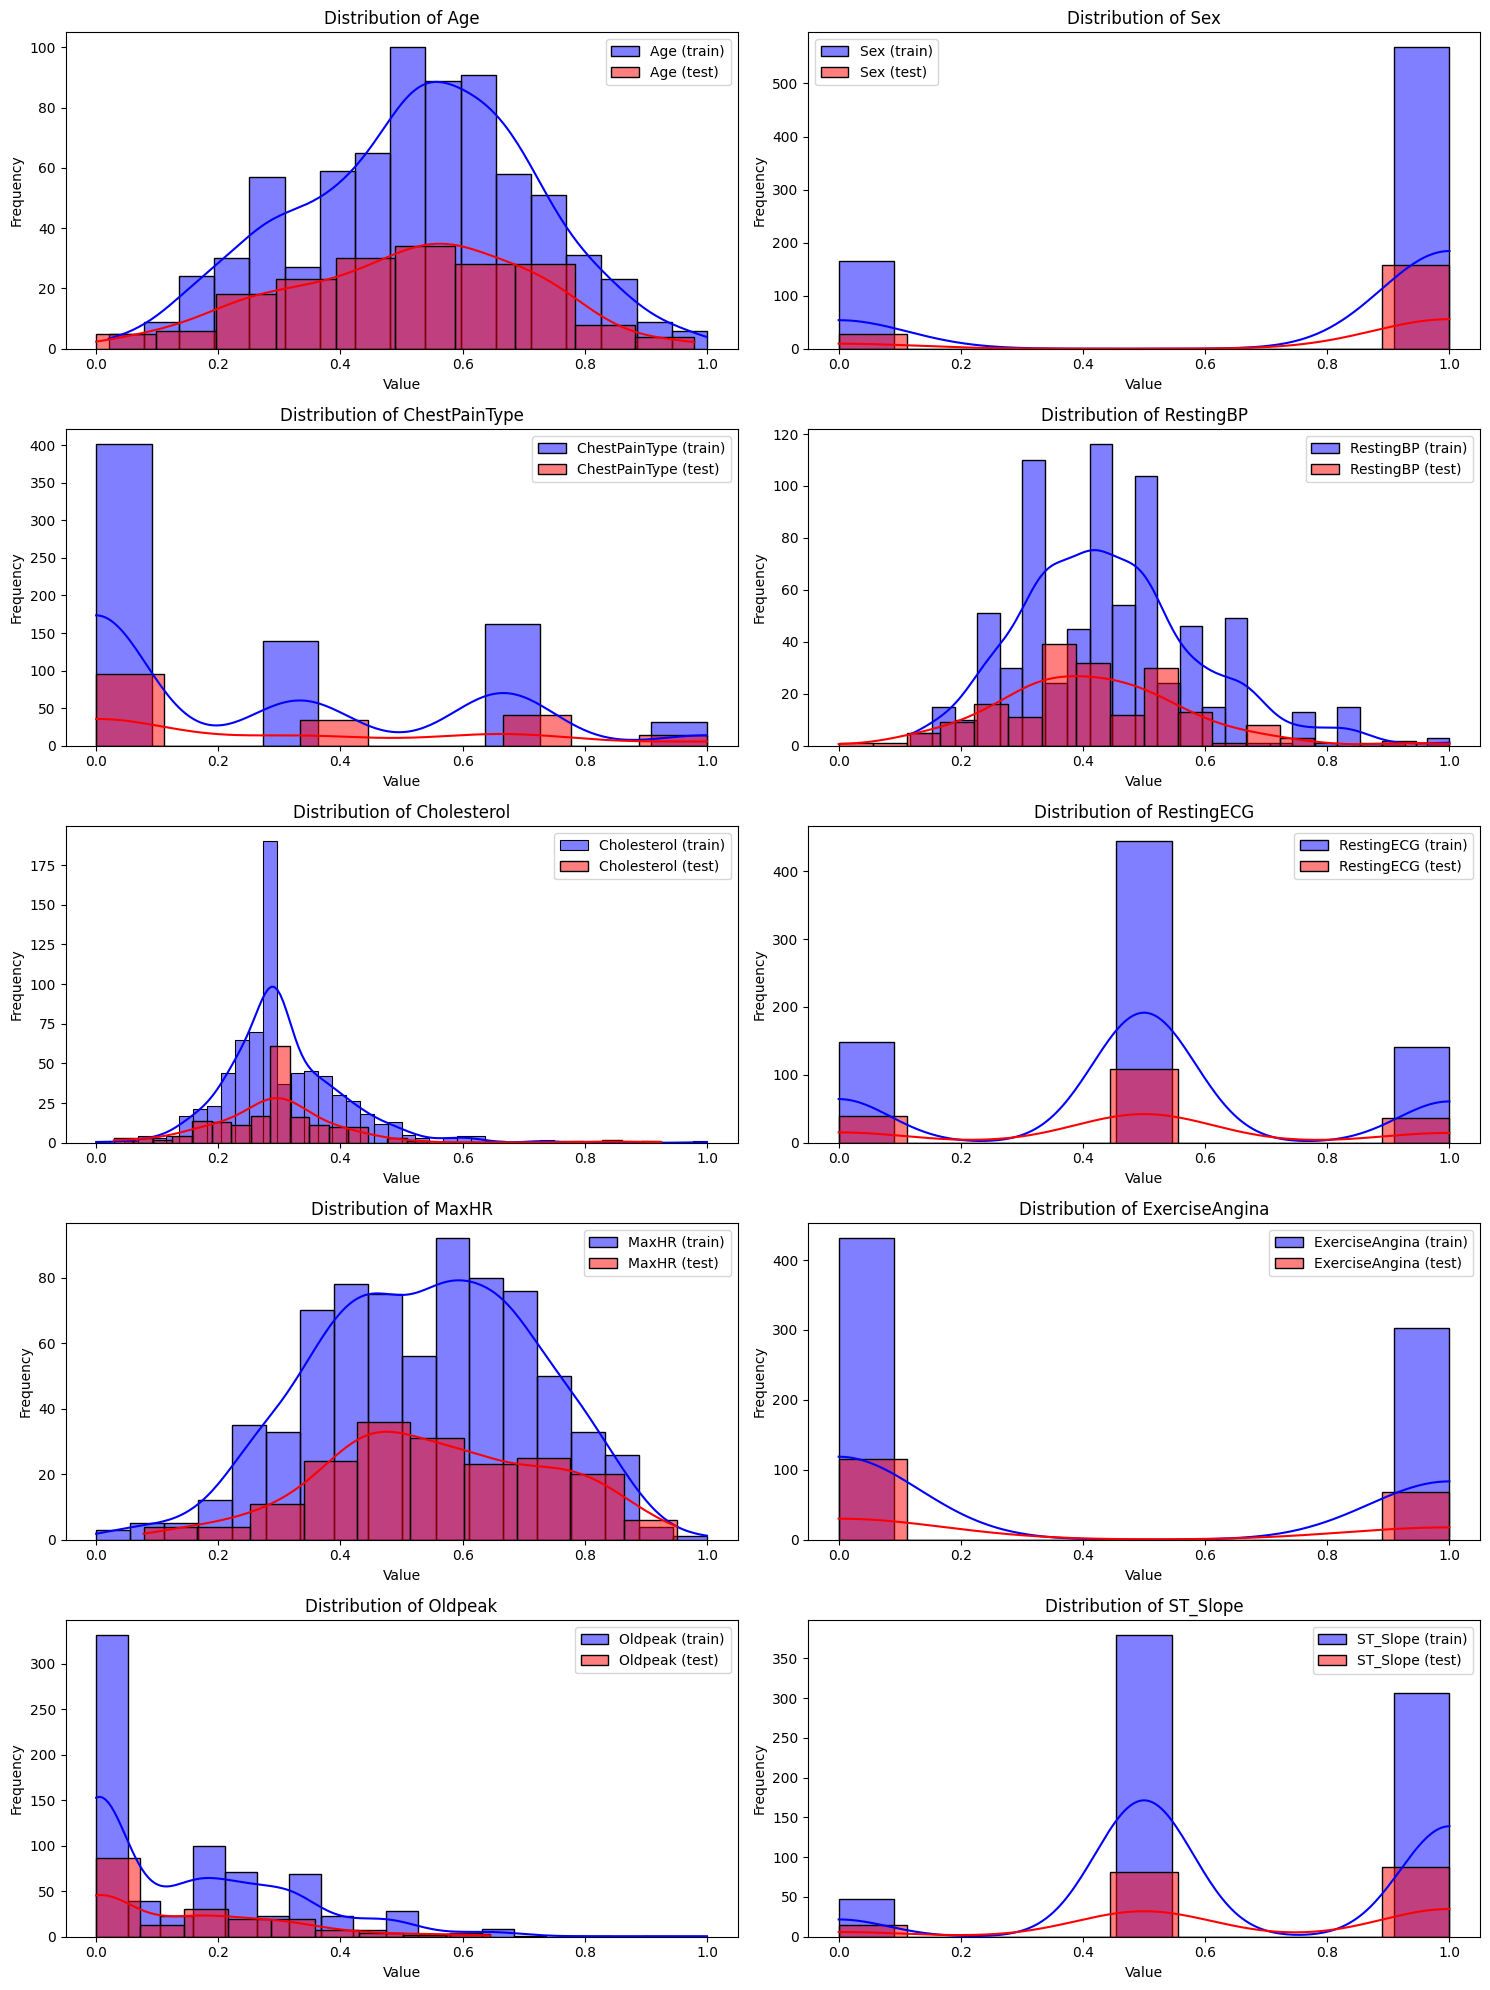

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    sns.histplot(X_train[column], kde=True, label=f'{column} (train)', color='blue', alpha=0.5, ax=axes[i])
    sns.histplot(X_test[column], kde=True, label=f'{column} (test)', color='red', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()
plt.savefig(cfg.HeartFailure.LOGS_PLOTS_PATH + '/distribution_train_test.png')

# <a id='toc11_'></a>[Models](#toc0_)

In [ ]:
def delete_directory(directory_path):
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Directory '{directory_path}' has been deleted.")
    else:
        print(f"Directory '{directory_path}' does not exist.")

Directory 'mlruns' does not exist.
Directory 'mlartifacts' has been deleted.


In [ ]:
directory_path = 'mlruns'
delete_directory(directory_path)
directory_path = 'mlartifacts'
delete_directory(directory_path)

> - GridSearch
>   - label MinMax
>   - label STD
>   - label Robust
>   - label log MinMax
>   - label log STD
>   - label log Robust
>   - onehot MinMax
>   - onehot STD
>   - onehot robust
> 
> - RandomSearch
>   - label MinMax
>   - label STD
>   - onehot MinMax
>   - onehot STD

In [124]:
def GridSearch(model,parameter_grid,X_train,y_train):
    grid_search = GridSearchCV(model, parameter_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search

In [125]:
def RandomSearch(model, param_distributions, X_train, y_train, n_iter=100, cv=5):
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=cv, random_state=42)
    random_search.fit(X_train, y_train)
    return random_search

In [126]:
def Remove_outliers_missing_value(data,impute='mean',replace_chestpain=False):
    if replace_chestpain:
        data['ChestPainType'].replace('TA', 'ATA', inplace=True)
    if impute=='mean':
        mean_cholesterol=data[data['Cholesterol'] != 0]['Cholesterol'].mean()
        data['Cholesterol'] = data['Cholesterol'].replace(0, mean_cholesterol)
        mean_RestingBP=data[data['RestingBP'] != 0]['RestingBP'].mean()
        data['RestingBP'] = data['RestingBP'].replace(0, mean_RestingBP)
        data['Oldpeak'] = data['Oldpeak'].abs()
    elif impute=='median':
        median_cholesterol=data[data['Cholesterol'] != 0]['Cholesterol'].median()
        data['Cholesterol'] = data['Cholesterol'].replace(0, median_cholesterol)
        median_RestingBP=data[data['RestingBP'] != 0]['RestingBP'].median()
        data['RestingBP'] = data['RestingBP'].replace(0, median_RestingBP)
        data['Oldpeak'] = data['Oldpeak'].abs()
    elif impute=='drop':
        data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
        data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
        data.dropna(inplace=True)
        data['Oldpeak'] = data['Oldpeak'].abs()
    elif impute=='none':
        data['Oldpeak'] = data['Oldpeak'].abs()
    else:
        raise Exception('Invalid Imputing Method')
    return data

In [127]:
def Remove_Missing_Values(data):
    return data

In [128]:
def preprocess(data,columns_to_encode,encode_type,columns_to_scale,scale_type,test_size,drop_cols=False,replace_chestpain=False):
    data = Remove_outliers_missing_value(data,impute='mean',replace_chestpain=replace_chestpain)
    data = Encode(data,columns_to_encode,type=encode_type)
    data = Scale(data,columns_to_scale,type=scale_type)
    if drop_cols:
        data = data.drop(columns='FastingBS')
    X_train, X_test, y_train, y_test = Split_data(data,'HeartDisease',test_size)
    return X_train, X_test, y_train, y_test

In [129]:
def drop_columns(data,columns):
    return data.drop(columns=columns)

In [130]:
def preprocessing_data(data):
    data_copy=data.copy()
    data_copy['Oldpeak'] = data_copy['Oldpeak'].abs()
    data_copy=data_copy.drop(columns=['FastingBS'])
    data_copy['Cholesterol'] = data_copy['Cholesterol'].replace(0, data_copy['Cholesterol'].replace(0,np.nan).dropna().median())
    data_copy['RestingBP'] = data_copy['RestingBP'].replace(0, data_copy['RestingBP'].replace(0,np.nan).dropna().median())
    return data_copy

In [131]:
def load_data():
    data=pd.read_csv(cfg.HeartFailure.PATH)
    return data

In [132]:
parameter_grid = {
    "SVM":cfg.HeartFailure.SVM_parameters_grid,
    "KNN":cfg.HeartFailure.KNN_parameters_grid,
    "GaussBayes":cfg.HeartFailure.GaussBayes_parameters_grid,
    "CatBayes":cfg.HeartFailure.CatBayes_parameters_grid,
    "BernoulliBayes":cfg.HeartFailure.bernoulliBayes_parameters_grid,
    "DT":cfg.HeartFailure.DT_parameters_grid,
}

In [133]:
models=['Grid_label_minmax_scaled','Random_label_minmax_scaled','Grid_onehot_minmax_scaled','Random_onehot_minmax_scaled','Grid_label_standard_scaled','Random_label_standard_scaled','Grid_onehot_standard_scaled','Random_onehot_standard_scaled','Grid_label_robust_scaled','Grid_onehot_robust_scaled','Grid_label_logminmax_scaled','Grid_label_logstandard_scaled','Grid_label_logrobust_scaled']

In [134]:
print("Number of Models =",len(models))

Number of Models = 13


In [ ]:
def plot_after_evaluation(reports,X_train,X_test,n_components=2):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    best_model_name = max(reports, key=lambda x: reports[x]['accuracy'])
    best_model = reports[best_model_name]['model']
    print(f"Best Model: {best_model_name}")

    y_pred = best_model.predict(X_test)

    misclassified = y_test != y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='Correctly Classified')
    plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1], c='red', label='Misclassified', marker='x')
    plt.title('PCA of Test Data with Misclassified Points')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

In [189]:
model=SVC()
print(str(model)[:-2])

SVC


In [194]:
def plot_search_results(search,model_names):
    results = pd.DataFrame(search.cv_results_)
    mean_test_scores = results['mean_test_score']
    params = results['params']

    plt.figure(figsize=(5, 3))
    plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', label='Mean Test Scores')
    # plt.scatter(range(len(mean_test_scores)), mean_test_scores, c=discretized_scores, cmap='viridis', label='Discretized Scores')
    plt.title('Parameter FineTuning Results for ' + str(model_names))
    plt.xlabel('Parameter Configuration Index')
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.xticks(range(0, len(params), max(1, len(params) // 15)), rotation=90)  # Show only 15 labels on x-axis
    # plt.colorbar(label='Discretized Score Bins')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [195]:
def train(model,X_train, X_test, y_train, y_test, parameter_grid,model_names,search_method='Grid'):
    if search_method == 'Grid':
        search = GridSearch(model, parameter_grid,X_train, y_train)
    elif search_method == 'Random':
        search = RandomSearch(model, parameter_grid,X_train, y_train)
    else:
        raise Exception('Invalid Search Method')
    plot_search_results(search,model_names)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_class0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class1 = f1_score(y_test, y_pred, pos_label=1)
    recall_class0 = recall_score(y_test, y_pred, pos_label=0)
    recall_class1 = recall_score(y_test, y_pred, pos_label=1)
    precision_class0 = precision_score(y_test, y_pred, pos_label=0)
    precision_class1 = precision_score(y_test, y_pred, pos_label=1)

    evaluation={
        "model":best_model,
        "accuracy":accuracy,
        "f1_class0":f1_class0,
        "f1_class1":f1_class1,
        "recall_class0":recall_class0,
        "recall_class1":recall_class1,
        "precision_class0":precision_class0,
        "precision_class1":precision_class1,
        "X_train":X_train,
        "X_test":X_test,
        "y_test":y_test,
        }
    return evaluation

In [196]:
def make_reports(data,models,classifier,params_grid,columns_to_encode,preprocess):
    reports={}
    if preprocess:
        data = preprocessing_data(data)
    data['Oldpeak'] = data['Oldpeak'].abs()
    for i in tqdm(models,desc="Training Models"):
        
        data_encoded = Encode(data, columns_to_encode, type=i.split('_')[1])
        data_scaled = Scale(data_encoded, data_encoded.columns.drop('HeartDisease'), type=i.split('_')[2])

        X_train, X_test, y_train, y_test = Split_data(data_scaled, 'HeartDisease', 0.2)

        if classifier=='SVM':
            model=SVC()
            report = train(model=model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, parameter_grid=params_grid, search_method=i.split('_')[0],model_names=i)
        elif classifier=='KNN':
            model=KNeighborsClassifier()
            report = train(model=model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, parameter_grid=params_grid, search_method=i.split('_')[0],model_names=i)
        elif classifier=='GaussBayes':
            model=GaussianNB()
            report = train(model=model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, parameter_grid=params_grid, search_method=i.split('_')[0],model_names=i)
        elif classifier=='CatBayes':
            model=CategoricalNB()
            report = train(model=model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, parameter_grid=params_grid, search_method=i.split('_')[0],model_names=i)
        elif classifier=='BernoulliBayes':
            model=BernoulliNB()
            report = train(model=model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, parameter_grid=params_grid, search_method=i.split('_')[0],model_names=i)
        elif classifier=='DT':
            model=DecisionTreeClassifier()
            report = train(model=model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, parameter_grid=params_grid, search_method=i.split('_')[0],model_names=i)
        else:
            raise Exception('Invalid Model Name')
        reports[i] = report
    return reports

In [197]:
def plot_accuracies(reports,models):
    accuracies = [reports[model]['accuracy'] for model in models]
    model_names = models

    colors = plt.cm.tab20(range(len(models)))

    plt.figure(figsize=(15, 6))
    for i, (accuracy, model_name) in enumerate(zip(accuracies, model_names)):
        plt.bar(model_name, accuracy*100, color=colors[i], label=model_name)
        plt.text(i, accuracy*100 + 0.005, f'{accuracy*100:.2f}', ha='center', va='bottom')

    plt.title('Histogram of Model Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.tight_layout()
    plt.show()

In [198]:
def save_models(reports,classifier):
    models_dir = os.path.join(cfg.HeartFailure.MODELS_PATH,classifier)
    os.makedirs(models_dir, exist_ok=True)

    for model_name, report in tqdm(reports.items(), desc="Saving Models"):
        model = report['model']
        model_path = f"{models_dir}/{model_name}.pkl"
        joblib.dump(model, model_path)
        print(f"Model {model_name} saved to {model_path}")

In [199]:
def make_excel(reports,classifier):
    results_df = pd.DataFrame.from_dict(reports, orient='index')
    os.makedirs(os.path.join(cfg.HeartFailure.LOGS_REPORTS_PATH,classifier), exist_ok=True)
    results_df.to_excel(os.path.join(cfg.HeartFailure.LOGS_REPORTS_PATH,classifier, 'model_evaluation.xlsx'))

In [200]:
def log_reports(data,models_names,experiment_name,classifier,parameters_grid,preprocess=True):
    reports=make_reports(data,models_names,classifier,params_grid=parameters_grid[classifier],columns_to_encode=cfg.HeartFailure.CATEGORICAL_COLUMNS,preprocess=preprocess)
    for model in models_names:
        print(f"Model : {model}  Accuracy : {(reports[model]['accuracy']*100):.2f}%")
    experiment_name=experiment_name+'_Preprocessing' if preprocess else experiment_name+'_No_Preprocessing'
    log_models_to_mlflow(models_names,reports,experiment_name)
    plot_accuracies(reports,models_names)
    save_models(reports,classifier)
    # plot_after_evaluation(reports)
    make_excel(reports,classifier)

> **💡IMPORTANT NOTE:** Make sure you have downloaded mlflow using `pip install mlflow` <br><br><br>
> **💡IMPORTANT NOTE:** You should run the following commands in terminal to see results of mlflow comparisons

> ```
> cd Src
> mlflow ui
> ```

> Then press this link [mlflow](http://127.0.0.1:5000/)

## <a id='toc11_1_'></a>[Phase 1](#toc0_)

In [ ]:
data=load_data()

### <a id='toc11_1_1_'></a>[Naive Bayes](#toc0_)

#### <a id='toc11_1_1_1_'></a>[Gaussian NB](#toc0_)

##### <a id='toc11_1_1_1_1_'></a>[Without Preprocessing](#toc0_)

Training Models:   0%|          | 0/13 [00:00<?, ?it/s]

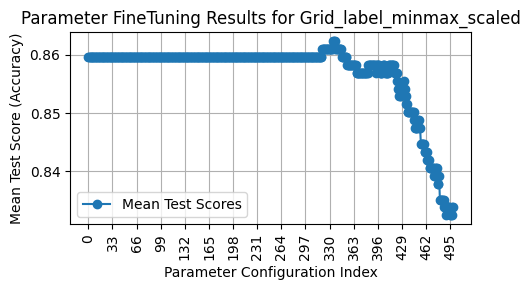

Training Models:   8%|▊         | 1/13 [00:07<01:27,  7.29s/it]

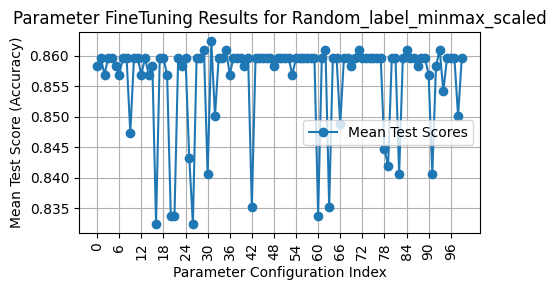

Training Models:  15%|█▌        | 2/13 [00:08<00:43,  3.96s/it]

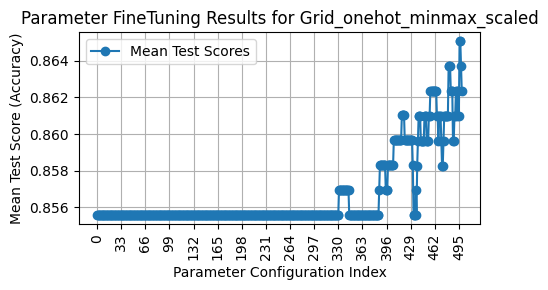

Training Models:  23%|██▎       | 3/13 [00:17<01:02,  6.24s/it]

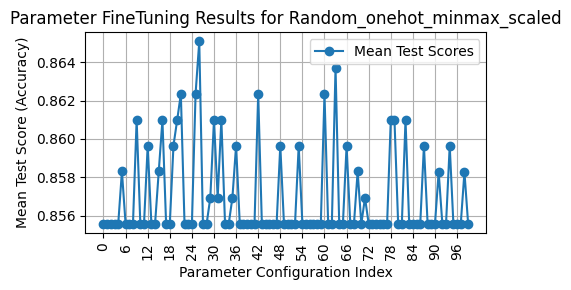

Training Models:  31%|███       | 4/13 [00:19<00:41,  4.59s/it]

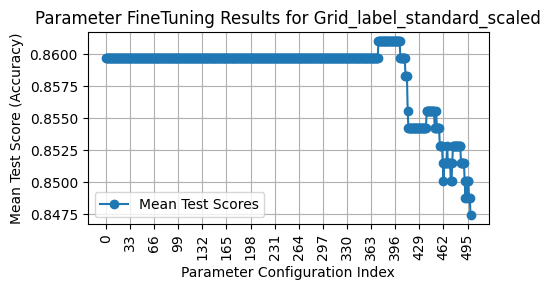

Training Models:  38%|███▊      | 5/13 [00:27<00:45,  5.69s/it]

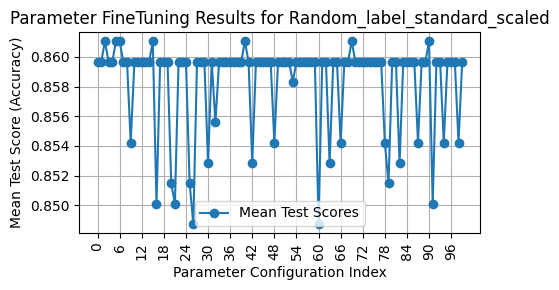

Training Models:  46%|████▌     | 6/13 [00:29<00:30,  4.34s/it]

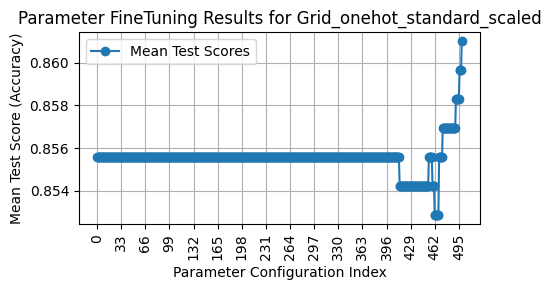

Training Models:  54%|█████▍    | 7/13 [00:38<00:35,  5.86s/it]

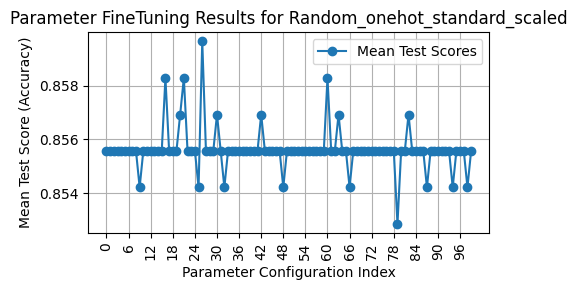

Training Models:  62%|██████▏   | 8/13 [00:40<00:23,  4.67s/it]

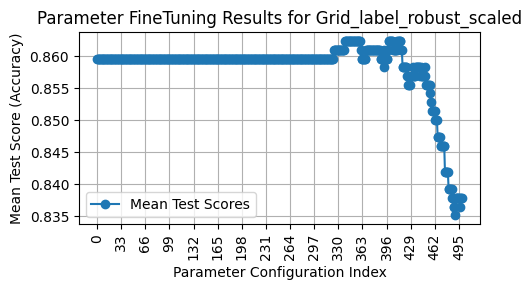

Training Models:  69%|██████▉   | 9/13 [00:49<00:23,  5.90s/it]

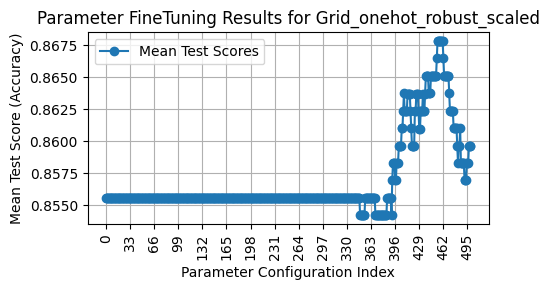

Training Models:  77%|███████▋  | 10/13 [00:59<00:21,  7.21s/it]

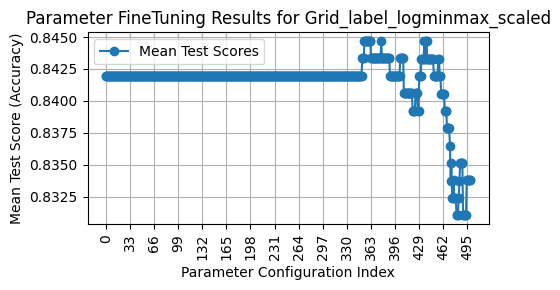

Training Models:  85%|████████▍ | 11/13 [01:06<00:14,  7.37s/it]

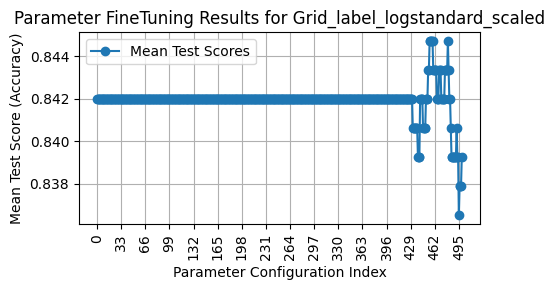

Training Models:  92%|█████████▏| 12/13 [01:14<00:07,  7.43s/it]

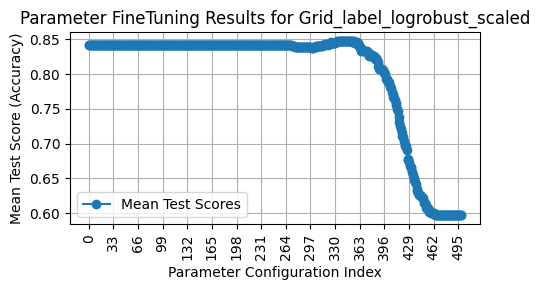

Training Models: 100%|██████████| 13/13 [01:21<00:00,  6.30s/it]


Model : Grid_label_minmax_scaled  Accuracy : 84.24%
Model : Random_label_minmax_scaled  Accuracy : 84.24%
Model : Grid_onehot_minmax_scaled  Accuracy : 83.70%
Model : Random_onehot_minmax_scaled  Accuracy : 83.70%
Model : Grid_label_standard_scaled  Accuracy : 84.24%
Model : Random_label_standard_scaled  Accuracy : 84.24%
Model : Grid_onehot_standard_scaled  Accuracy : 83.15%
Model : Random_onehot_standard_scaled  Accuracy : 83.15%
Model : Grid_label_robust_scaled  Accuracy : 83.70%
Model : Grid_onehot_robust_scaled  Accuracy : 86.41%
Model : Grid_label_logminmax_scaled  Accuracy : 82.61%
Model : Grid_label_logstandard_scaled  Accuracy : 82.07%
Model : Grid_label_logrobust_scaled  Accuracy : 80.43%


Logging models to MLflow:   0%|          | 0/13 [00:00<?, ?it/s]

2024/12/05 22:27:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/b67088c98611417eaf466b2c15bfe4e5.
2024/12/05 22:27:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:   8%|▊         | 1/13 [00:04<00:49,  4.09s/it]

2024/12/05 22:27:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/d83fa60cc5744b6cb81132bc2bbc74f2.
2024/12/05 22:27:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  15%|█▌        | 2/13 [00:07<00:43,  3.97s/it]

2024/12/05 22:27:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/3c73aa814fec4dd3937a9169ab01bd25.
2024/12/05 22:27:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  23%|██▎       | 3/13 [00:11<00:38,  3.89s/it]

2024/12/05 22:27:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/027f5a8f63984bf7a352e55f81a3bdc9.
2024/12/05 22:27:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  31%|███       | 4/13 [00:15<00:35,  3.92s/it]

2024/12/05 22:27:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/defbeb4d61244ba4b215149351e4316a.
2024/12/05 22:27:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  38%|███▊      | 5/13 [00:19<00:31,  3.98s/it]

2024/12/05 22:27:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/0a28702cabe8439baa40616bf756f01d.
2024/12/05 22:27:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  46%|████▌     | 6/13 [00:23<00:27,  3.93s/it]

2024/12/05 22:27:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/6e3d994e54a54472b9d36b4d0b9de873.
2024/12/05 22:27:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  54%|█████▍    | 7/13 [00:27<00:23,  3.92s/it]

2024/12/05 22:27:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/4b48499df3d64d598576f4c264279c08.
2024/12/05 22:27:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  62%|██████▏   | 8/13 [00:31<00:19,  3.90s/it]

2024/12/05 22:27:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_robust_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/492ed621d8e344f8a03d3bf0bad74801.
2024/12/05 22:27:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  69%|██████▉   | 9/13 [00:35<00:15,  3.91s/it]

2024/12/05 22:27:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_onehot_robust_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/a77b153509b84a4da459af2143975757.
2024/12/05 22:27:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  77%|███████▋  | 10/13 [00:39<00:11,  3.91s/it]

2024/12/05 22:27:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_logminmax_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/c462a23144b54bc58ca22983bf320212.
2024/12/05 22:27:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  85%|████████▍ | 11/13 [00:43<00:07,  3.92s/it]

2024/12/05 22:27:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_logstandard_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/a42d58c09e664e48b417ba236dc0ce52.
2024/12/05 22:27:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow:  92%|█████████▏| 12/13 [00:47<00:03,  3.93s/it]

2024/12/05 22:27:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_logrobust_scaled at: http://127.0.0.1:5000/#/experiments/884048206072206429/runs/b037b940c8624680af88061cde37ef72.
2024/12/05 22:27:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/884048206072206429.
Logging models to MLflow: 100%|██████████| 13/13 [00:51<00:00,  3.93s/it]


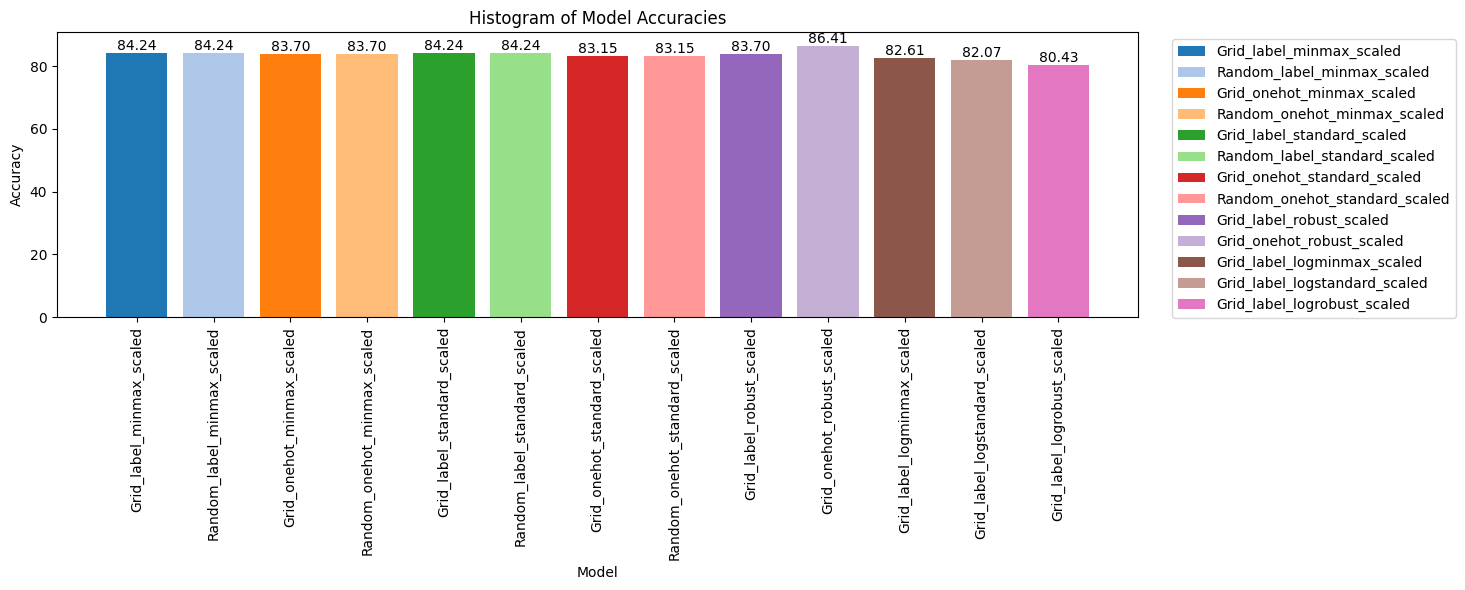

Saving Models: 100%|██████████| 13/13 [00:00<00:00, 866.45it/s]

Model Grid_label_minmax_scaled saved to ../Models\GaussBayes/Grid_label_minmax_scaled.pkl
Model Random_label_minmax_scaled saved to ../Models\GaussBayes/Random_label_minmax_scaled.pkl
Model Grid_onehot_minmax_scaled saved to ../Models\GaussBayes/Grid_onehot_minmax_scaled.pkl
Model Random_onehot_minmax_scaled saved to ../Models\GaussBayes/Random_onehot_minmax_scaled.pkl
Model Grid_label_standard_scaled saved to ../Models\GaussBayes/Grid_label_standard_scaled.pkl
Model Random_label_standard_scaled saved to ../Models\GaussBayes/Random_label_standard_scaled.pkl
Model Grid_onehot_standard_scaled saved to ../Models\GaussBayes/Grid_onehot_standard_scaled.pkl
Model Random_onehot_standard_scaled saved to ../Models\GaussBayes/Random_onehot_standard_scaled.pkl
Model Grid_label_robust_scaled saved to ../Models\GaussBayes/Grid_label_robust_scaled.pkl
Model Grid_onehot_robust_scaled saved to ../Models\GaussBayes/Grid_onehot_robust_scaled.pkl
Model Grid_label_logminmax_scaled saved to ../Models\Gauss

In [ ]:
log_reports(data,models,"GaussBayes","GaussBayes",parameters_grid=parameter_grid,preprocess=False)

##### <a id='toc11_1_1_1_2_'></a>[With Preprocessing](#toc0_)

Training Models: 100%|██████████| 13/13 [01:23<00:00,  6.45s/it]


Model : Grid_label_minmax_scaled  Accuracy : 79.35%
Model : Random_label_minmax_scaled  Accuracy : 79.35%
Model : Grid_onehot_minmax_scaled  Accuracy : 82.07%
Model : Random_onehot_minmax_scaled  Accuracy : 81.52%
Model : Grid_label_standard_scaled  Accuracy : 79.35%
Model : Random_label_standard_scaled  Accuracy : 79.35%
Model : Grid_onehot_standard_scaled  Accuracy : 80.43%
Model : Random_onehot_standard_scaled  Accuracy : 82.07%
Model : Grid_label_robust_scaled  Accuracy : 78.80%
Model : Grid_onehot_robust_scaled  Accuracy : 82.61%
Model : Grid_label_logminmax_scaled  Accuracy : 78.26%
Model : Grid_label_logstandard_scaled  Accuracy : 78.26%
Model : Grid_label_logrobust_scaled  Accuracy : 78.26%


Logging models to MLflow:   0%|          | 0/13 [00:00<?, ?it/s]

2024/12/05 21:53:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/1427298c5e4146b8b141c06990b42e5a.
2024/12/05 21:53:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:   8%|▊         | 1/13 [00:04<00:58,  4.90s/it]

2024/12/05 21:53:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/dc34935e4bab427db597111c5413c180.
2024/12/05 21:53:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  15%|█▌        | 2/13 [00:09<00:49,  4.51s/it]

2024/12/05 21:53:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/d3076f71775845e6884a6bf34da4ebb1.
2024/12/05 21:53:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  23%|██▎       | 3/13 [00:13<00:44,  4.44s/it]

2024/12/05 21:53:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/d92b10559d3d473b86738ada88ac5f61.
2024/12/05 21:53:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  31%|███       | 4/13 [00:17<00:40,  4.45s/it]

2024/12/05 21:53:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/31c9f777ca524d68abc14d27619abab3.
2024/12/05 21:53:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  38%|███▊      | 5/13 [00:22<00:35,  4.40s/it]

2024/12/05 21:53:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/018b88375e92459d9b4cc28f08c051eb.
2024/12/05 21:53:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  46%|████▌     | 6/13 [00:26<00:30,  4.33s/it]

2024/12/05 21:53:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/e9c7addd1a3c41dcbd3d99f1ff28008f.
2024/12/05 21:53:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  54%|█████▍    | 7/13 [00:30<00:25,  4.24s/it]

2024/12/05 21:53:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/92b8b08cab69419fbadcb2436de95e1d.
2024/12/05 21:53:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  62%|██████▏   | 8/13 [00:34<00:20,  4.19s/it]

2024/12/05 21:53:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_robust_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/b76d0dbdf4274160b99255786cc5bfc9.
2024/12/05 21:53:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  69%|██████▉   | 9/13 [00:38<00:16,  4.11s/it]

2024/12/05 21:53:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_onehot_robust_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/8d594e3eca084c79a5b3826d9fb60498.
2024/12/05 21:53:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  77%|███████▋  | 10/13 [00:42<00:12,  4.06s/it]

2024/12/05 21:53:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_logminmax_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/d1e23c935af54981bcb7c87ab7d4fc4e.
2024/12/05 21:53:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  85%|████████▍ | 11/13 [00:46<00:08,  4.03s/it]

2024/12/05 21:53:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_logstandard_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/2a57f1cdb5374e79b6306644874d56f6.
2024/12/05 21:53:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow:  92%|█████████▏| 12/13 [00:50<00:04,  4.00s/it]

2024/12/05 21:54:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_logrobust_scaled at: http://127.0.0.1:5000/#/experiments/544995703135239493/runs/6d4a4fc0960b46c9b3979c8754fe00de.
2024/12/05 21:54:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/544995703135239493.
Logging models to MLflow: 100%|██████████| 13/13 [00:54<00:00,  4.19s/it]


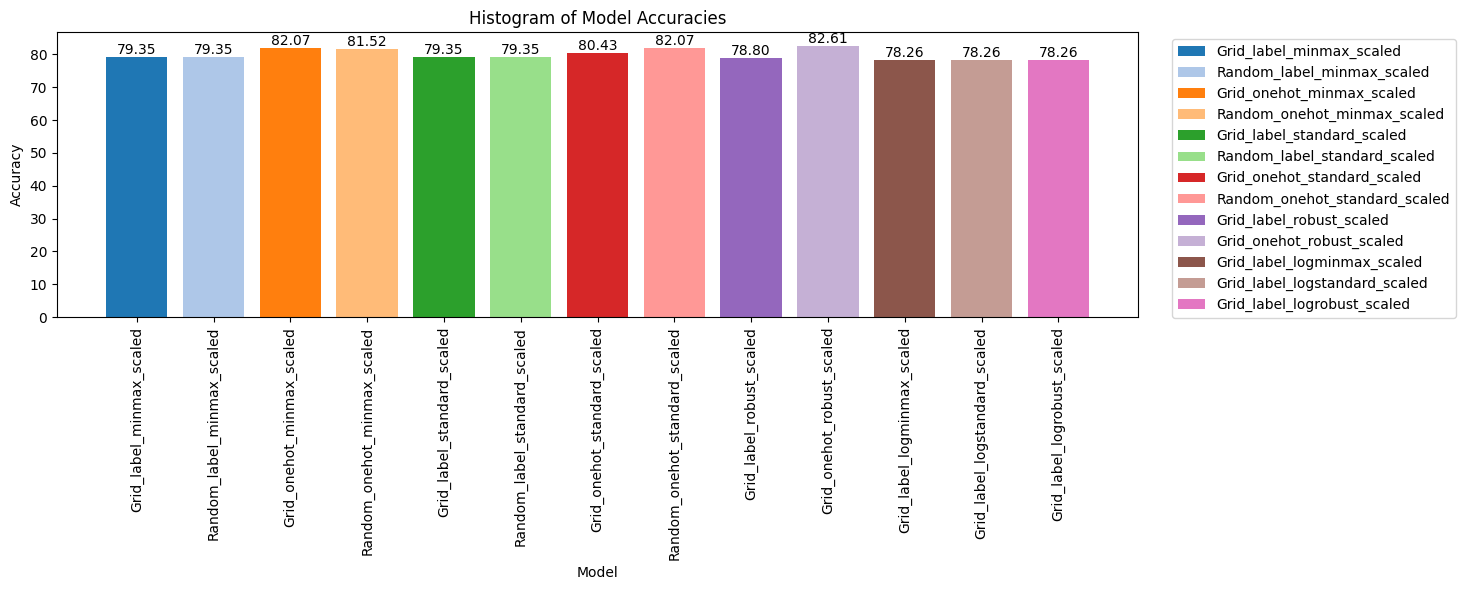

Saving Models: 100%|██████████| 13/13 [00:00<00:00, 1021.37it/s]

Model Grid_label_minmax_scaled saved to ../Models\GaussBayes/Grid_label_minmax_scaled.pkl
Model Random_label_minmax_scaled saved to ../Models\GaussBayes/Random_label_minmax_scaled.pkl
Model Grid_onehot_minmax_scaled saved to ../Models\GaussBayes/Grid_onehot_minmax_scaled.pkl
Model Random_onehot_minmax_scaled saved to ../Models\GaussBayes/Random_onehot_minmax_scaled.pkl
Model Grid_label_standard_scaled saved to ../Models\GaussBayes/Grid_label_standard_scaled.pkl
Model Random_label_standard_scaled saved to ../Models\GaussBayes/Random_label_standard_scaled.pkl
Model Grid_onehot_standard_scaled saved to ../Models\GaussBayes/Grid_onehot_standard_scaled.pkl
Model Random_onehot_standard_scaled saved to ../Models\GaussBayes/Random_onehot_standard_scaled.pkl
Model Grid_label_robust_scaled saved to ../Models\GaussBayes/Grid_label_robust_scaled.pkl
Model Grid_onehot_robust_scaled saved to ../Models\GaussBayes/Grid_onehot_robust_scaled.pkl
Model Grid_label_logminmax_scaled saved to ../Models\Gauss

In [ ]:
log_reports(data,models,"GaussBayes","GaussBayes",parameters_grid=parameter_grid,preprocess=True)

#### <a id='toc11_1_1_2_'></a>[Categorical NB](#toc0_)

##### <a id='toc11_1_1_2_1_'></a>[Without Preprocessing](#toc0_)

In [ ]:
# log_reports(data,models,"CatBayes","CatBayes",parameters_grid=parameter_grid,preprocess=False)

##### <a id='toc11_1_1_2_2_'></a>[With Preprocessing](#toc0_)

In [ ]:
# log_reports(data,models,"CatBayes","CatBayes",parameters_grid=parameter_grid,preprocess=True)

#### <a id='toc11_1_1_3_'></a>[Bernoulli NB](#toc0_)

##### <a id='toc11_1_1_3_1_'></a>[Without Preprocessing](#toc0_)

In [ ]:
log_reports(data,models,"BernoulliBayes","BernoulliBayes",parameters_grid=parameter_grid,preprocess=False)

##### <a id='toc11_1_1_3_2_'></a>[With Preprocessing](#toc0_)

In [ ]:
log_reports(data,models,"BernoulliBayes","BernoulliBayes",parameters_grid=parameter_grid,preprocess=True)

### <a id='toc11_1_2_'></a>[SVM](#toc0_)

##### <a id='toc11_1_2_1_1_'></a>[Without Preprocessing](#toc0_)

Training Models: 100%|██████████| 13/13 [06:12<00:00, 28.64s/it]


Model : Grid_label_minmax_scaled  Accuracy : 85.33%
Model : Random_label_minmax_scaled  Accuracy : 85.33%
Model : Grid_onehot_minmax_scaled  Accuracy : 85.33%
Model : Random_onehot_minmax_scaled  Accuracy : 85.33%
Model : Grid_label_standard_scaled  Accuracy : 86.96%
Model : Random_label_standard_scaled  Accuracy : 86.96%
Model : Grid_onehot_standard_scaled  Accuracy : 86.96%
Model : Random_onehot_standard_scaled  Accuracy : 86.96%
Model : Grid_label_robust_scaled  Accuracy : 85.33%
Model : Grid_onehot_robust_scaled  Accuracy : 86.96%
Model : Grid_label_logminmax_scaled  Accuracy : 86.96%
Model : Grid_label_logstandard_scaled  Accuracy : 88.59%
Model : Grid_label_logrobust_scaled  Accuracy : 85.87%


Logging models to MLflow:   0%|          | 0/13 [00:00<?, ?it/s]2024/12/05 05:24:48 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/12/05 05:24:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Grid_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/986396635406839365/runs/5281e6af8d2f42e5b5d1a6409c8119a4.
2024/12/05 05:24:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986396635406839365.
Logging models to MLflow:   8%|▊         | 1/13 [00:04<00:48,  4.04s/it]2024/12/05 05:24:51 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/12/05 05:24:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/986396635406839365/runs/1eff525ef

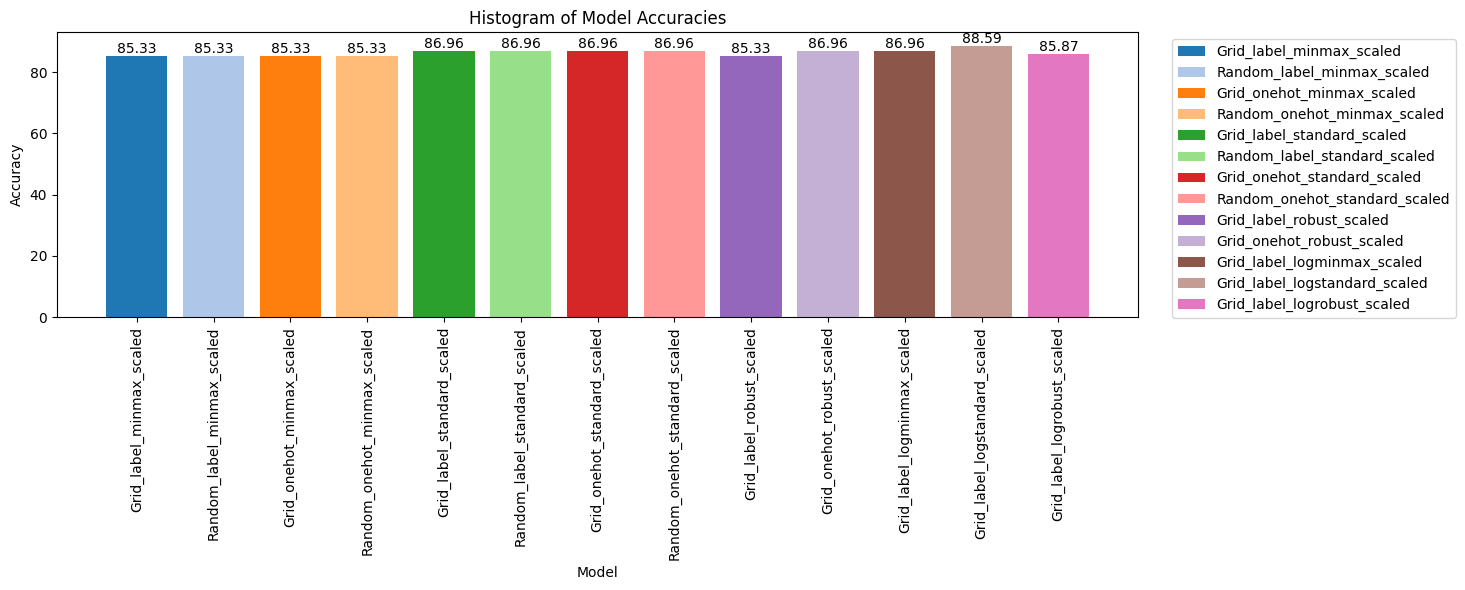

Saving Models: 100%|██████████| 13/13 [00:00<00:00, 502.24it/s]


Model Grid_label_minmax_scaled saved to ../Models\SVM/Grid_label_minmax_scaled.pkl
Model Random_label_minmax_scaled saved to ../Models\SVM/Random_label_minmax_scaled.pkl
Model Grid_onehot_minmax_scaled saved to ../Models\SVM/Grid_onehot_minmax_scaled.pkl
Model Random_onehot_minmax_scaled saved to ../Models\SVM/Random_onehot_minmax_scaled.pkl
Model Grid_label_standard_scaled saved to ../Models\SVM/Grid_label_standard_scaled.pkl
Model Random_label_standard_scaled saved to ../Models\SVM/Random_label_standard_scaled.pkl
Model Grid_onehot_standard_scaled saved to ../Models\SVM/Grid_onehot_standard_scaled.pkl
Model Random_onehot_standard_scaled saved to ../Models\SVM/Random_onehot_standard_scaled.pkl
Model Grid_label_robust_scaled saved to ../Models\SVM/Grid_label_robust_scaled.pkl
Model Grid_onehot_robust_scaled saved to ../Models\SVM/Grid_onehot_robust_scaled.pkl
Model Grid_label_logminmax_scaled saved to ../Models\SVM/Grid_label_logminmax_scaled.pkl
Model Grid_label_logstandard_scaled sav

In [ ]:
log_reports(data,models,"SVM","SVM",parameters_grid=parameter_grid,preprocess=False)

##### <a id='toc11_1_2_1_2_'></a>[With Preprocessing](#toc0_)

In [ ]:
log_reports(data,models,"SVM","SVM",parameters_grid=parameter_grid,preprocess=True)

## <a id='toc11_2_'></a>[Phase 2](#toc0_)

### <a id='toc11_2_1_'></a>[Decision Trees](#toc0_)

#### <a id='toc11_2_1_1_'></a>[Without Preprocessing](#toc0_)

Training Models: 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]


Model : Grid_label_minmax_scaled  Accuracy : 84.78%
Model : Random_label_minmax_scaled  Accuracy : 84.78%
Model : Grid_onehot_minmax_scaled  Accuracy : 84.78%
Model : Random_onehot_minmax_scaled  Accuracy : 85.33%
Model : Grid_label_standard_scaled  Accuracy : 84.78%
Model : Random_label_standard_scaled  Accuracy : 84.78%
Model : Grid_onehot_standard_scaled  Accuracy : 84.78%
Model : Random_onehot_standard_scaled  Accuracy : 85.87%
Model : Grid_label_robust_scaled  Accuracy : 85.33%
Model : Grid_onehot_robust_scaled  Accuracy : 85.87%
Model : Grid_label_logminmax_scaled  Accuracy : 85.87%
Model : Grid_label_logstandard_scaled  Accuracy : 84.78%
Model : Grid_label_logrobust_scaled  Accuracy : 86.41%


Logging models to MLflow:   8%|▊         | 1/13 [00:03<00:42,  3.55s/it]

🏃 View run Grid_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/09ade55ee26c4067aa5aa2319d613693
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  15%|█▌        | 2/13 [00:07<00:39,  3.60s/it]

🏃 View run Random_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/9220cfbccb9f4858a61634a99b0dc6de
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  23%|██▎       | 3/13 [00:11<00:37,  3.74s/it]

🏃 View run Grid_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/d3b3077da5dc4a968b6cb0fb171dd0df
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  31%|███       | 4/13 [00:14<00:34,  3.79s/it]

🏃 View run Random_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/ddd6370d2c21435a83945159d1b699f6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  38%|███▊      | 5/13 [00:18<00:29,  3.66s/it]

🏃 View run Grid_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/a0ee3abb04484017b569594d69f954d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  46%|████▌     | 6/13 [00:22<00:25,  3.65s/it]

🏃 View run Random_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/97c6414d86054073bcca06883637b966
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  54%|█████▍    | 7/13 [00:25<00:21,  3.56s/it]

🏃 View run Grid_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/b2e4a850337c4d108f5f0313c8c6e325
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  62%|██████▏   | 8/13 [00:28<00:17,  3.49s/it]

🏃 View run Random_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/e930fb55f45b49449f5e6d6eb15ad4bc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  69%|██████▉   | 9/13 [00:32<00:13,  3.50s/it]

🏃 View run Grid_label_robust_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/f34017343fe74105921a45961156f6cb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  77%|███████▋  | 10/13 [00:35<00:10,  3.39s/it]

🏃 View run Grid_onehot_robust_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/4b662b2a2fe64a4f86602505a4ea9d4e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  85%|████████▍ | 11/13 [00:38<00:06,  3.37s/it]

🏃 View run Grid_label_logminmax_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/5ad253b61db147cc8af688cac63639d0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow:  92%|█████████▏| 12/13 [00:42<00:03,  3.34s/it]

🏃 View run Grid_label_logstandard_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/7c68ac8507ca44229418c75102f77b23
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


Logging models to MLflow: 100%|██████████| 13/13 [00:45<00:00,  3.47s/it]

🏃 View run Grid_label_logrobust_scaled at: http://127.0.0.1:5000/#/experiments/978541441419477737/runs/7f6a5b2405224dd9b3fabb70920ea506
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978541441419477737


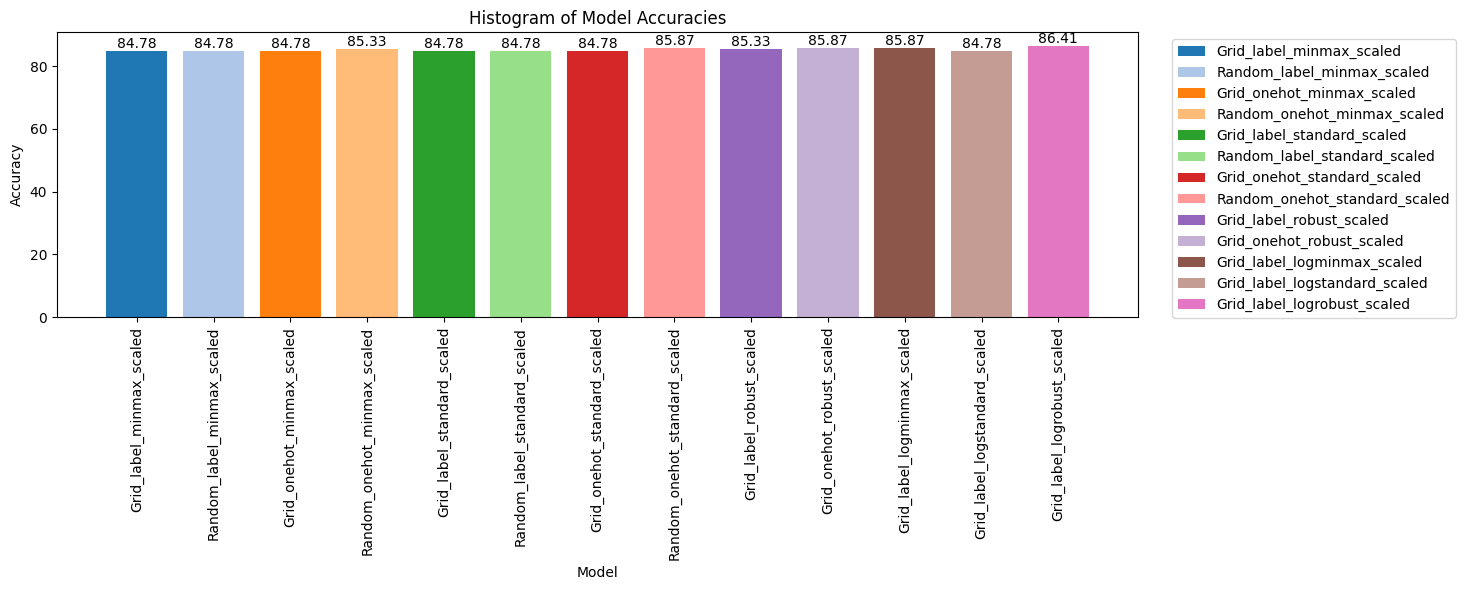

Saving Models: 100%|██████████| 13/13 [00:00<00:00, 454.75it/s]


Model Grid_label_minmax_scaled saved to ../Models\DT/Grid_label_minmax_scaled.pkl
Model Random_label_minmax_scaled saved to ../Models\DT/Random_label_minmax_scaled.pkl
Model Grid_onehot_minmax_scaled saved to ../Models\DT/Grid_onehot_minmax_scaled.pkl
Model Random_onehot_minmax_scaled saved to ../Models\DT/Random_onehot_minmax_scaled.pkl
Model Grid_label_standard_scaled saved to ../Models\DT/Grid_label_standard_scaled.pkl
Model Random_label_standard_scaled saved to ../Models\DT/Random_label_standard_scaled.pkl
Model Grid_onehot_standard_scaled saved to ../Models\DT/Grid_onehot_standard_scaled.pkl
Model Random_onehot_standard_scaled saved to ../Models\DT/Random_onehot_standard_scaled.pkl
Model Grid_label_robust_scaled saved to ../Models\DT/Grid_label_robust_scaled.pkl
Model Grid_onehot_robust_scaled saved to ../Models\DT/Grid_onehot_robust_scaled.pkl
Model Grid_label_logminmax_scaled saved to ../Models\DT/Grid_label_logminmax_scaled.pkl
Model Grid_label_logstandard_scaled saved to ../Mo

In [ ]:
log_reports(data,models,"DT","DT",parameters_grid=parameter_grid,preprocess=False)


#### <a id='toc11_2_1_2_'></a>[With Preprocessing](#toc0_)

Training Models: 100%|██████████| 13/13 [00:07<00:00,  1.68it/s]
2024/12/05 18:04:48 INFO mlflow.tracking.fluent: Experiment with name 'DT_Preprocessing' does not exist. Creating a new experiment.


Model : Grid_label_minmax_scaled  Accuracy : 83.15%
Model : Random_label_minmax_scaled  Accuracy : 83.15%
Model : Grid_onehot_minmax_scaled  Accuracy : 83.15%
Model : Random_onehot_minmax_scaled  Accuracy : 83.15%
Model : Grid_label_standard_scaled  Accuracy : 83.15%
Model : Random_label_standard_scaled  Accuracy : 83.15%
Model : Grid_onehot_standard_scaled  Accuracy : 83.15%
Model : Random_onehot_standard_scaled  Accuracy : 83.15%
Model : Grid_label_robust_scaled  Accuracy : 83.15%
Model : Grid_onehot_robust_scaled  Accuracy : 83.15%
Model : Grid_label_logminmax_scaled  Accuracy : 83.15%
Model : Grid_label_logstandard_scaled  Accuracy : 83.15%
Model : Grid_label_logrobust_scaled  Accuracy : 83.15%


Logging models to MLflow:   8%|▊         | 1/13 [00:03<00:42,  3.57s/it]

🏃 View run Grid_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/8a997e29c2134a34a00f7afd0893450c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  15%|█▌        | 2/13 [00:06<00:38,  3.46s/it]

🏃 View run Random_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/b78f5ada571440bcaa508436731c4b17
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  23%|██▎       | 3/13 [00:10<00:35,  3.50s/it]

🏃 View run Grid_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/81799ec40b3a43d998cb43283bf0c9d3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  31%|███       | 4/13 [00:14<00:31,  3.53s/it]

🏃 View run Random_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/ba7e379ab8c546e99b1c6ad0af747c88
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  38%|███▊      | 5/13 [00:17<00:28,  3.55s/it]

🏃 View run Grid_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/48dda22f961c445da9715d59cc7298cb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  46%|████▌     | 6/13 [00:21<00:25,  3.59s/it]

🏃 View run Random_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/052d7d97f862436abf7d40be388ec205
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  54%|█████▍    | 7/13 [00:24<00:21,  3.57s/it]

🏃 View run Grid_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/e8aa31f7a8094c218eab5a3ae3979b34
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  62%|██████▏   | 8/13 [00:28<00:17,  3.50s/it]

🏃 View run Random_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/2516401937cf40fa8f5c16e01f4e29e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  69%|██████▉   | 9/13 [00:31<00:13,  3.44s/it]

🏃 View run Grid_label_robust_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/1736cbc5d7c64b88b09c8884ab56c874
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  77%|███████▋  | 10/13 [00:34<00:10,  3.37s/it]

🏃 View run Grid_onehot_robust_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/41b580fbc81f4851a836ff188b1193ad
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  85%|████████▍ | 11/13 [00:37<00:06,  3.31s/it]

🏃 View run Grid_label_logminmax_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/96da9214cb74431ab2b33e88e3d6dbb2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow:  92%|█████████▏| 12/13 [00:41<00:03,  3.32s/it]

🏃 View run Grid_label_logstandard_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/1ee31a9b40634aa18035de52c508d6cc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


Logging models to MLflow: 100%|██████████| 13/13 [00:44<00:00,  3.41s/it]

🏃 View run Grid_label_logrobust_scaled at: http://127.0.0.1:5000/#/experiments/986595078271450177/runs/fe6e9af02a0c49ff8117164b4a8369a8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/986595078271450177


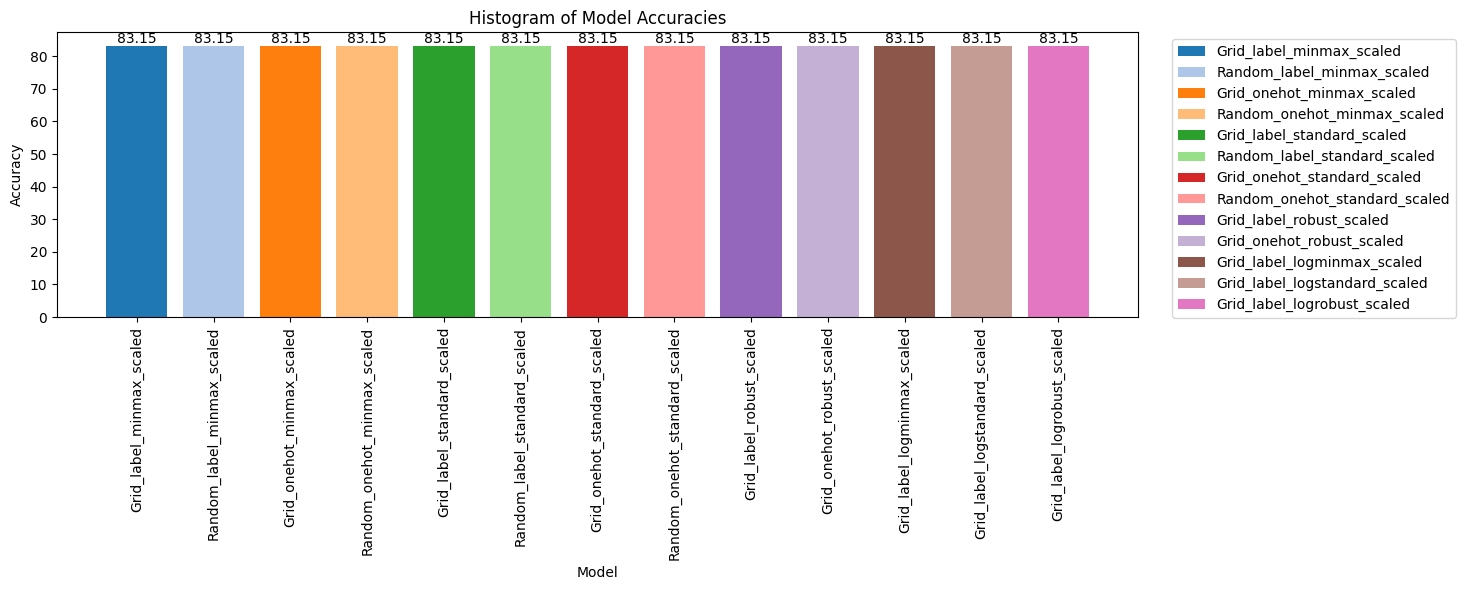

Saving Models: 100%|██████████| 13/13 [00:00<00:00, 1129.14it/s]

Model Grid_label_minmax_scaled saved to ../Models\DT/Grid_label_minmax_scaled.pkl
Model Random_label_minmax_scaled saved to ../Models\DT/Random_label_minmax_scaled.pkl
Model Grid_onehot_minmax_scaled saved to ../Models\DT/Grid_onehot_minmax_scaled.pkl
Model Random_onehot_minmax_scaled saved to ../Models\DT/Random_onehot_minmax_scaled.pkl
Model Grid_label_standard_scaled saved to ../Models\DT/Grid_label_standard_scaled.pkl
Model Random_label_standard_scaled saved to ../Models\DT/Random_label_standard_scaled.pkl
Model Grid_onehot_standard_scaled saved to ../Models\DT/Grid_onehot_standard_scaled.pkl
Model Random_onehot_standard_scaled saved to ../Models\DT/Random_onehot_standard_scaled.pkl
Model Grid_label_robust_scaled saved to ../Models\DT/Grid_label_robust_scaled.pkl
Model Grid_onehot_robust_scaled saved to ../Models\DT/Grid_onehot_robust_scaled.pkl
Model Grid_label_logminmax_scaled saved to ../Models\DT/Grid_label_logminmax_scaled.pkl
Model Grid_label_logstandard_scaled saved to ../Mo

In [ ]:
log_reports(data,models,"DT","DT",parameters_grid=parameter_grid,preprocess=True)


### <a id='toc11_2_2_'></a>[KNN](#toc0_)

#### <a id='toc11_2_2_1_'></a>[Without Preprocessing](#toc0_)

Training Models: 100%|██████████| 13/13 [02:48<00:00, 12.96s/it]
2024/12/05 18:08:22 INFO mlflow.tracking.fluent: Experiment with name 'KNN_No_Preprocessing' does not exist. Creating a new experiment.


Model : Grid_label_minmax_scaled  Accuracy : 88.04%
Model : Random_label_minmax_scaled  Accuracy : 86.96%
Model : Grid_onehot_minmax_scaled  Accuracy : 83.70%
Model : Random_onehot_minmax_scaled  Accuracy : 83.70%
Model : Grid_label_standard_scaled  Accuracy : 89.13%
Model : Random_label_standard_scaled  Accuracy : 89.67%
Model : Grid_onehot_standard_scaled  Accuracy : 86.96%
Model : Random_onehot_standard_scaled  Accuracy : 86.96%
Model : Grid_label_robust_scaled  Accuracy : 88.59%
Model : Grid_onehot_robust_scaled  Accuracy : 88.04%
Model : Grid_label_logminmax_scaled  Accuracy : 88.59%
Model : Grid_label_logstandard_scaled  Accuracy : 84.24%
Model : Grid_label_logrobust_scaled  Accuracy : 86.96%


Logging models to MLflow:   8%|▊         | 1/13 [00:04<00:51,  4.33s/it]

🏃 View run Grid_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/86f63386804045b9a731633474d58326
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  15%|█▌        | 2/13 [00:08<00:47,  4.29s/it]

🏃 View run Random_label_minmax_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/787ec417fc5e48e1a62b8fa7c940ef13
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  23%|██▎       | 3/13 [00:13<00:45,  4.51s/it]

🏃 View run Grid_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/90132d9862f940dfa2b687f79a8d81fa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  31%|███       | 4/13 [00:17<00:38,  4.23s/it]

🏃 View run Random_onehot_minmax_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/4d2893c248984780859413eb30b688d0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  38%|███▊      | 5/13 [00:21<00:33,  4.17s/it]

🏃 View run Grid_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/9bc87a2c6bbf4bb1b8304a737540cd42
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  46%|████▌     | 6/13 [00:25<00:28,  4.08s/it]

🏃 View run Random_label_standard_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/0e3e8a31089b4a2f8d23231c2df1694c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  54%|█████▍    | 7/13 [00:29<00:24,  4.01s/it]

🏃 View run Grid_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/fc8e3c02a7fc4ba880369b91aa814050
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  62%|██████▏   | 8/13 [00:33<00:20,  4.02s/it]

🏃 View run Random_onehot_standard_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/23bc3ad3dc0a4c098f71a885d1c1c1f6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  69%|██████▉   | 9/13 [00:37<00:16,  4.10s/it]

🏃 View run Grid_label_robust_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/db2b5593ab2e40f1875fd37dfed053df
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  77%|███████▋  | 10/13 [00:40<00:11,  3.94s/it]

🏃 View run Grid_onehot_robust_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/7e17d8ac93084a07ac535f6a9c72b5c2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  85%|████████▍ | 11/13 [00:45<00:08,  4.04s/it]

🏃 View run Grid_label_logminmax_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/c0bdacf053394c9985a31924d868bdfc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow:  92%|█████████▏| 12/13 [00:49<00:04,  4.09s/it]

🏃 View run Grid_label_logstandard_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/a5e83cac55504a8daa2cc5296ae7b510
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


Logging models to MLflow: 100%|██████████| 13/13 [00:53<00:00,  4.10s/it]

🏃 View run Grid_label_logrobust_scaled at: http://127.0.0.1:5000/#/experiments/818512929780648265/runs/9a5d88d7f3e041baaf1d054217c21f29
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/818512929780648265


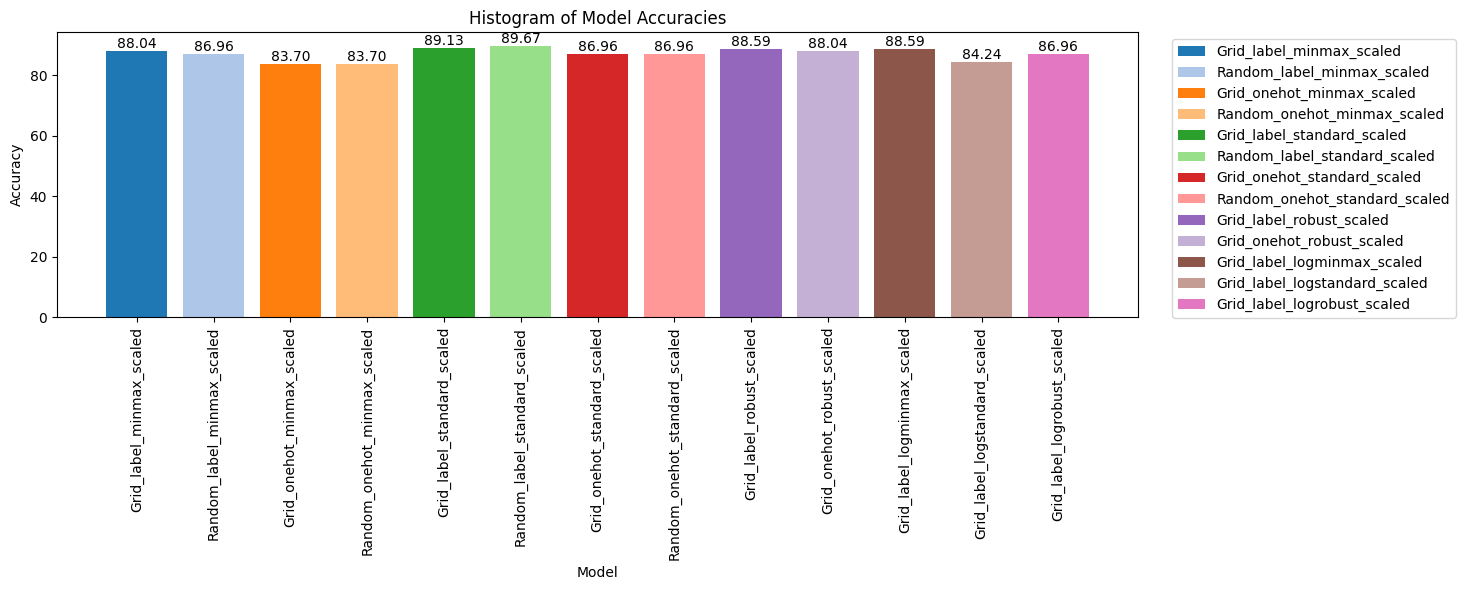

Saving Models: 100%|██████████| 13/13 [00:00<00:00, 540.85it/s]


Model Grid_label_minmax_scaled saved to ../Models\KNN/Grid_label_minmax_scaled.pkl
Model Random_label_minmax_scaled saved to ../Models\KNN/Random_label_minmax_scaled.pkl
Model Grid_onehot_minmax_scaled saved to ../Models\KNN/Grid_onehot_minmax_scaled.pkl
Model Random_onehot_minmax_scaled saved to ../Models\KNN/Random_onehot_minmax_scaled.pkl
Model Grid_label_standard_scaled saved to ../Models\KNN/Grid_label_standard_scaled.pkl
Model Random_label_standard_scaled saved to ../Models\KNN/Random_label_standard_scaled.pkl
Model Grid_onehot_standard_scaled saved to ../Models\KNN/Grid_onehot_standard_scaled.pkl
Model Random_onehot_standard_scaled saved to ../Models\KNN/Random_onehot_standard_scaled.pkl
Model Grid_label_robust_scaled saved to ../Models\KNN/Grid_label_robust_scaled.pkl
Model Grid_onehot_robust_scaled saved to ../Models\KNN/Grid_onehot_robust_scaled.pkl
Model Grid_label_logminmax_scaled saved to ../Models\KNN/Grid_label_logminmax_scaled.pkl
Model Grid_label_logstandard_scaled sav

In [ ]:
reports=log_reports(data,models,'KNN','KNN',parameters_grid=parameter_grid,preprocess=False)


#### <a id='toc11_2_2_2_'></a>[With Preprocessing](#toc0_)

In [ ]:
log_reports(data,models,'KNN','KNN',parameters_grid=parameter_grid,preprocess=True)

## <a id='toc11_3_'></a>[Extra Preprocessing](#toc0_)

## <a id='toc11_4_'></a>[Extra Models](#toc0_)

### <a id='toc11_4_1_'></a>[MLP](#toc0_)

### <a id='toc11_4_2_'></a>[Logistion Regression](#toc0_)

### <a id='toc11_4_3_'></a>[XGBoost](#toc0_)